In [1]:
from UTILITY_quickstart import *

In [2]:
importedDefaultSettings = loadConfig("setLattice_configs/2025-06-17_twoBunch_forMuons_6GeV.yml")

importedDefaultSettings = importedDefaultSettings | { "inputBeamFilePathSuffix" : '/beams/2025-05-13_twobunch_unoptimized_shortSpacing/2025-05-13_twobunch_unoptimized_shortSpacing.h5' }
importedDefaultSettings = importedDefaultSettings | { "L3PhaseSet" : 0.0 } 

In [3]:
csrTF = False
evalElement = "PENT"



inputBeamFilePathSuffix = importedDefaultSettings["inputBeamFilePathSuffix"]
bunchCount = importedDefaultSettings["bunchCount"]
tao = initializeTao(
    #inputBeamFilePathSuffix = '/beams/nmmToL0AFEND_2bunch_2024-02-16Clean/2024-02-16_2bunch_1e5Downsample_nudgeWeights.h5',
    inputBeamFilePathSuffix = inputBeamFilePathSuffix,
    
    csrTF = csrTF,
    numMacroParticles=1e3,
    scratchPath = "/tmp",
    randomizeFileNames = True
)

Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao
Tracking to end
CSR off
Overwriting lattice with setLattice() defaults
No defaults file provided to setLattice(). Using /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/setLattice_configs/defaults.yml
Number of macro particles = 1000.0
Beam created, written to /tmp/beams/activeBeamFile_5527482056445275882.h5, and reinit to tao


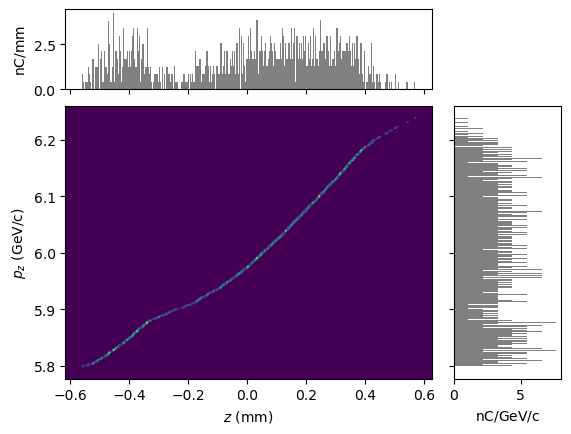

556.6901276588295


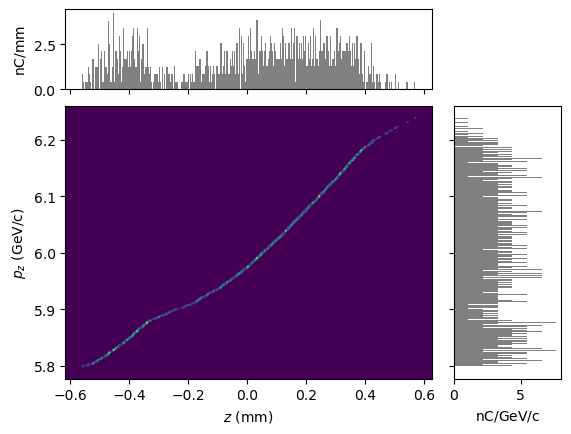

In [4]:
activeSettings = importedDefaultSettings | { "L1PhaseSet" : -20, "L2PhaseSet" : -45 }

setLattice(tao, **activeSettings)
trackBeam(tao, **activeSettings)
P = getBeamAtElement(tao, "BEGBC20")
display(plotMod(P, 'z', 'pz', bins=300))

PDrive, PWitness = getDriverAndWitness(P)
print( 1e6 * (np.median(PDrive.z) - np.median(PWitness.z)) ) 




In [5]:
results = []

for linearCompressionTerm in np.arange( -20e-3, 20e-3, 0.2e-3 ):
    for quadraticCompressionTerm in np.arange( -0.5, 0.5, 0.005 ):
        
        
        PMod = P.copy()
        
        meanPz = np.mean( PMod.pz ) 
        normalizedPz = ( PMod.pz - meanPz ) / meanPz
        PMod.z = PMod.z + linearCompressionTerm * normalizedPz + quadraticCompressionTerm * normalizedPz ** 2

        # print(linearCompressionTerm, ", ", quadraticCompressionTerm) 
        # display(plotMod(PMod, 'z', 'pz', bins=300))
        # plt.clf()
        
        PDrive, PWitness = getDriverAndWitness(PMod)
        #print( 1e6 * (np.median(PDrive.z) - np.median(PWitness.z)) )

        driverLength = smallestIntervalImpliedSigma( PDrive.z )
        witnessLength = smallestIntervalImpliedSigma( PWitness.z )
        
        results.append(
            {
                "linearCompressionTerm" : linearCompressionTerm,
                "quadraticCompressionTerm" : quadraticCompressionTerm, 
                "spacingUm" : 1e6 * (np.median(PDrive.z) - np.median(PWitness.z)),
                "driverLength" : driverLength,
                "witnessLength" : witnessLength,
                "longestBunchLength" : max(driverLength, witnessLength)
            }
        )
    

{'linearCompressionTerm': -0.013800000000000038, 'quadraticCompressionTerm': 0.0700000000000005, 'spacingUm': 47.69260799492856, 'driverLength': 8.547056438498485e-06, 'witnessLength': 8.701422416968695e-06, 'longestBunchLength': 8.701422416968695e-06}


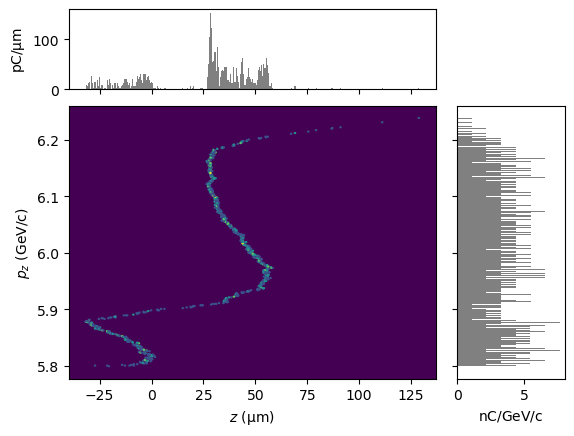

In [6]:
targetSpacingUm = 40

def getBestCase(results):

    subset = [ row for row in results if (row["spacingUm"] - targetSpacingUm) < 10 ]
    
    bestDict = {}
    bestSetting = 1e9
    
    for row in subset:
        if row["longestBunchLength"] < bestSetting:
            bestSetting = row["longestBunchLength"]
            bestDict = row

    return bestDict


bestDict = getBestCase(results)

print(bestDict)

linearCompressionTerm = bestDict["linearCompressionTerm"]
quadraticCompressionTerm = bestDict["quadraticCompressionTerm"]



PMod = P.copy()

meanPz = np.mean( PMod.pz ) 
normalizedPz = ( PMod.pz - meanPz ) / meanPz
PMod.z = PMod.z + linearCompressionTerm * normalizedPz + quadraticCompressionTerm * normalizedPz ** 2

#print(linearCompressionTerm, ", ", quadraticCompressionTerm) 
display(plotMod(PMod, 'z', 'pz', bins=300))
plt.clf()

PDrive, PWitness = getDriverAndWitness(PMod)

In [7]:
# targetSpacing = 40e-6
# bestResult = min(results, key=lambda x: ( x[1] - targetSpacing ) ** 2)
# print(bestResult)
# bestR56 = bestResult[0]


# PMod = P.copy()
    
# meanPz = np.mean( PMod.pz ) 
# PMod.z = PMod.z + ( bestR56 ) * ( PMod.pz - meanPz ) / meanPz

# display(plotMod(PMod, 'z', 'pz', bins=300))
# plt.clf()


## Automate




-40 -50
{'linearCompressionTerm': -0.015600000000000027, 'quadraticCompressionTerm': 0.12000000000000055, 'spacingUm': 47.36119996019283, 'driverLength': 3.366008666233873e-05, 'witnessLength': 3.3616407044601514e-05, 'longestBunchLength': 3.366008666233873e-05}


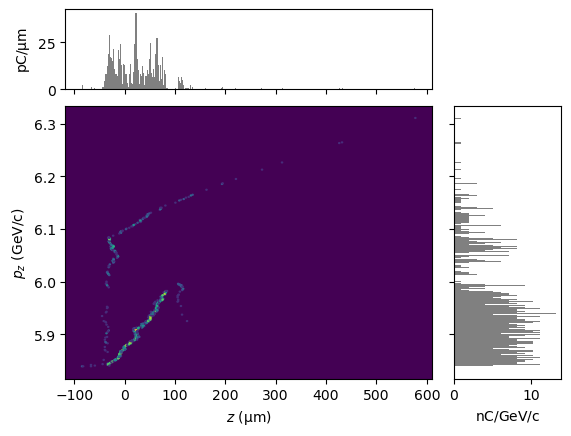




-40 -48
{'linearCompressionTerm': -0.014800000000000032, 'quadraticCompressionTerm': 0.1750000000000006, 'spacingUm': 49.98715521619757, 'driverLength': 3.507904826813758e-05, 'witnessLength': 3.533688461054574e-05, 'longestBunchLength': 3.533688461054574e-05}


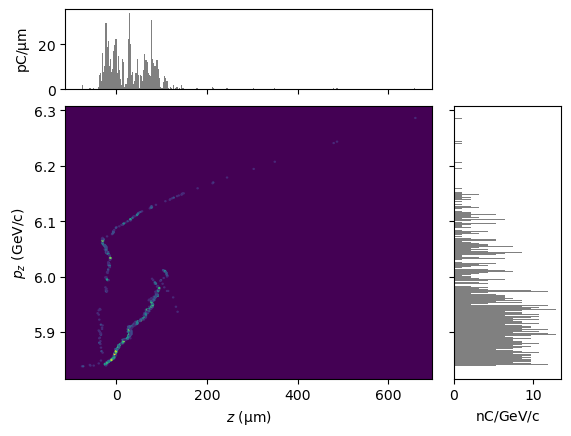




-40 -46
{'linearCompressionTerm': -0.013800000000000038, 'quadraticCompressionTerm': 0.22000000000000064, 'spacingUm': 49.607818114347616, 'driverLength': 3.4513328287761985e-05, 'witnessLength': 3.4747311654551346e-05, 'longestBunchLength': 3.4747311654551346e-05}


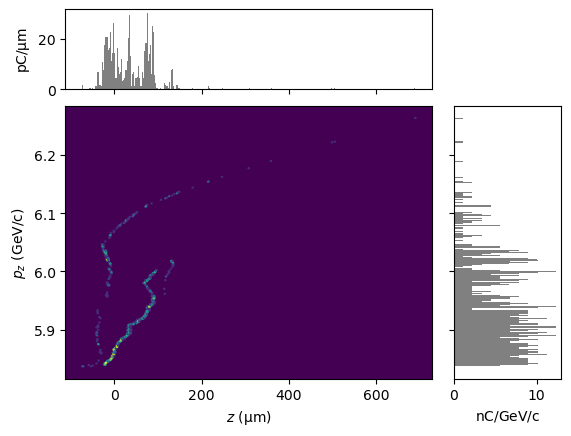




-40 -44
{'linearCompressionTerm': -0.012200000000000048, 'quadraticCompressionTerm': 0.2850000000000007, 'spacingUm': 48.32604725261353, 'driverLength': 4.3283361428671136e-05, 'witnessLength': 4.2571459510862814e-05, 'longestBunchLength': 4.3283361428671136e-05}


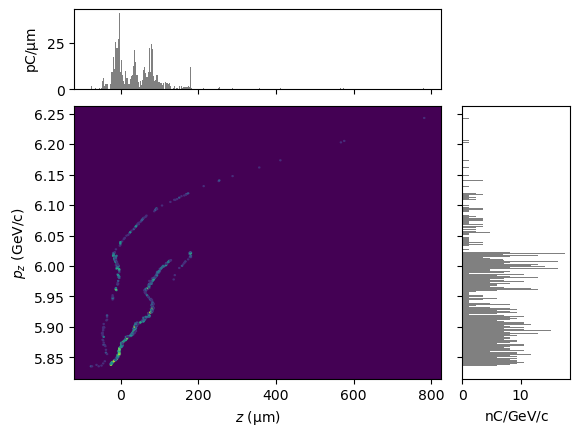




-40 -42
{'linearCompressionTerm': -0.009800000000000062, 'quadraticCompressionTerm': 0.4300000000000008, 'spacingUm': 48.74516031150063, 'driverLength': 5.934015361126936e-05, 'witnessLength': 5.889907806943774e-05, 'longestBunchLength': 5.934015361126936e-05}


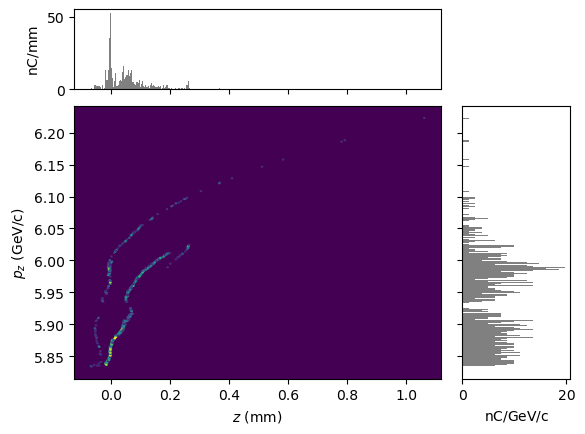




-40 -40
{'linearCompressionTerm': -0.00680000000000008, 'quadraticCompressionTerm': 0.4950000000000009, 'spacingUm': 49.53649007141623, 'driverLength': 8.5902829080805e-05, 'witnessLength': 5.9251470028402456e-05, 'longestBunchLength': 8.5902829080805e-05}


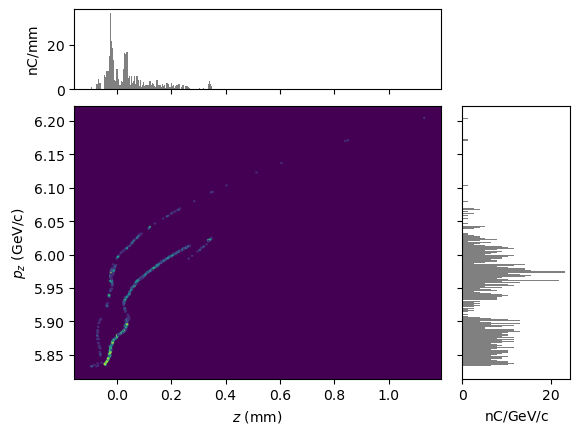




-40 -38
{'linearCompressionTerm': -0.004600000000000094, 'quadraticCompressionTerm': 0.36000000000000076, 'spacingUm': 49.86805333340479, 'driverLength': 0.00011142763408328791, 'witnessLength': 4.360240699059833e-05, 'longestBunchLength': 0.00011142763408328791}


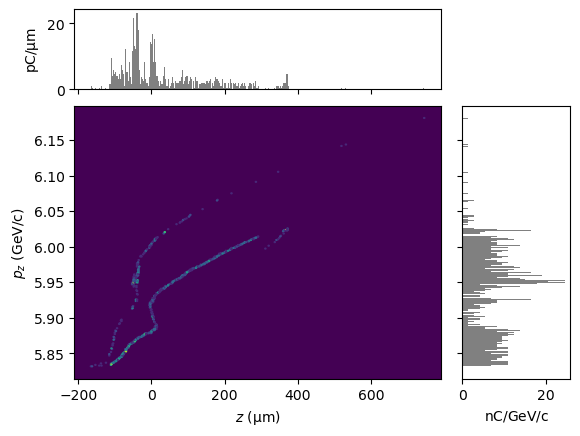




-40 -36
{'linearCompressionTerm': 0.009999999999999818, 'quadraticCompressionTerm': 0.4950000000000009, 'spacingUm': 49.8234275246691, 'driverLength': 0.0002376726564010377, 'witnessLength': 0.0001259420230585633, 'longestBunchLength': 0.0002376726564010377}


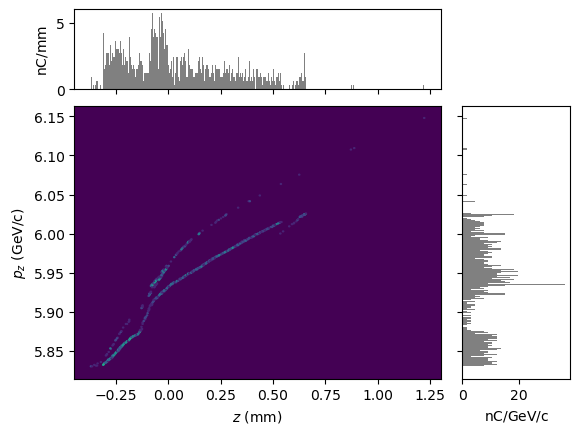




-40 -34
FAILED



-40 -32
FAILED



-40 -30
FAILED



-40 -28
FAILED



-40 -26
FAILED



-40 -24
FAILED



-40 -22
FAILED



-40 -20
FAILED



-40 -18
FAILED



-40 -16
FAILED



-40 -14
FAILED



-40 -12
FAILED



-40 -10
FAILED



-40 -8
FAILED



-40 -6
FAILED



-40 -4
FAILED



-40 -2
FAILED



-38 -50
{'linearCompressionTerm': -0.009400000000000065, 'quadraticCompressionTerm': 0.03000000000000047, 'spacingUm': 49.43498841933709, 'driverLength': 4.3729985573039726e-05, 'witnessLength': 4.3140633660811204e-05, 'longestBunchLength': 4.3729985573039726e-05}


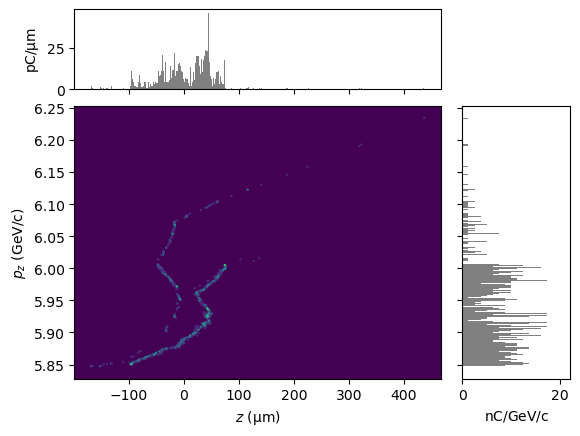




-38 -48
{'linearCompressionTerm': -0.010800000000000056, 'quadraticCompressionTerm': 0.2600000000000007, 'spacingUm': 49.85277192828409, 'driverLength': 3.1499606446083636e-05, 'witnessLength': 4.185579506924303e-05, 'longestBunchLength': 4.185579506924303e-05}


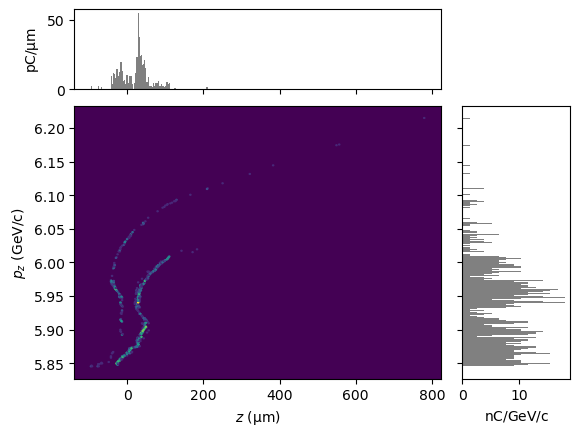




-38 -46
{'linearCompressionTerm': -0.007000000000000079, 'quadraticCompressionTerm': 0.20000000000000062, 'spacingUm': 49.93401203146707, 'driverLength': 6.637735664843247e-05, 'witnessLength': 6.12643188965178e-05, 'longestBunchLength': 6.637735664843247e-05}


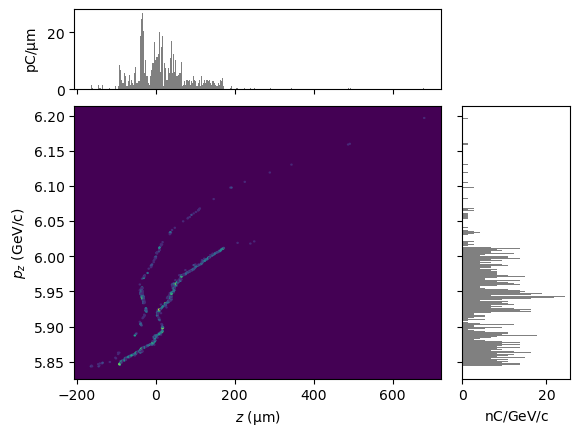




-38 -44
FAILED



-38 -42
{'linearCompressionTerm': -0.01860000000000001, 'quadraticCompressionTerm': -0.495, 'spacingUm': 49.91517196198875, 'driverLength': 2.9987089179570764e-05, 'witnessLength': 6.523880437868597e-05, 'longestBunchLength': 6.523880437868597e-05}


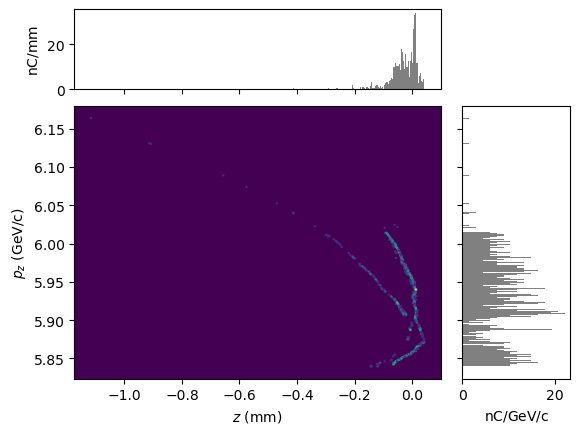




-38 -40
{'linearCompressionTerm': -0.019000000000000006, 'quadraticCompressionTerm': -0.08999999999999964, 'spacingUm': 49.99917211974858, 'driverLength': 2.0266661654807585e-05, 'witnessLength': 6.510933759351269e-05, 'longestBunchLength': 6.510933759351269e-05}


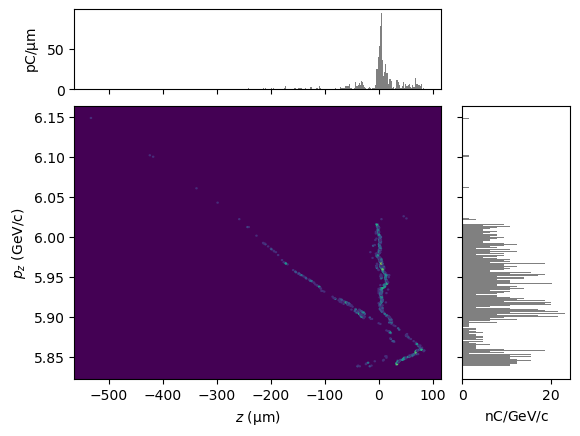




-38 -38
{'linearCompressionTerm': -0.0198, 'quadraticCompressionTerm': -0.18499999999999972, 'spacingUm': 49.73998722546953, 'driverLength': 2.08360557265481e-05, 'witnessLength': 6.363304367643032e-05, 'longestBunchLength': 6.363304367643032e-05}


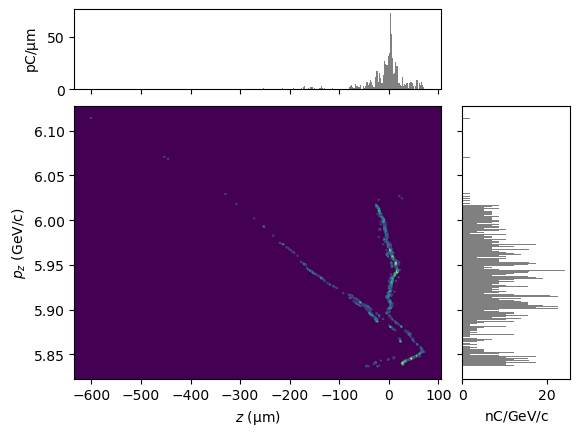




-38 -36
FAILED



-38 -34
FAILED



-38 -32
FAILED



-38 -30
FAILED



-38 -28
FAILED



-38 -26
FAILED



-38 -24
FAILED



-38 -22
FAILED



-38 -20
FAILED



-38 -18
FAILED



-38 -16
FAILED



-38 -14
FAILED



-38 -12
FAILED



-38 -10
FAILED



-38 -8
FAILED



-38 -6
FAILED



-38 -4
FAILED



-38 -2
FAILED



-36 -50
{'linearCompressionTerm': -0.01180000000000005, 'quadraticCompressionTerm': 0.36000000000000076, 'spacingUm': 40.86690337253617, 'driverLength': 1.1409390595564185e-05, 'witnessLength': 2.193790728541358e-05, 'longestBunchLength': 2.193790728541358e-05}


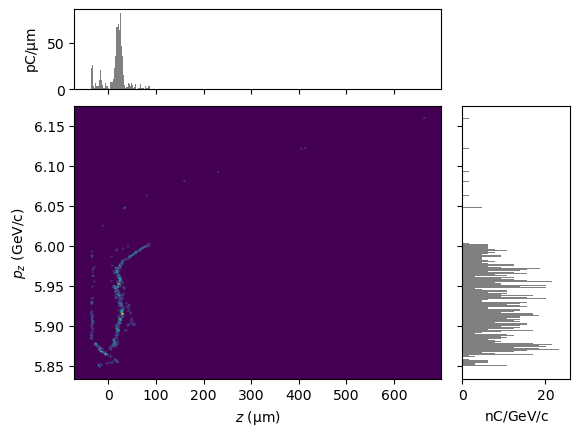




-36 -48
{'linearCompressionTerm': -0.013200000000000042, 'quadraticCompressionTerm': 0.2800000000000007, 'spacingUm': 49.72969199632584, 'driverLength': 1.2092404884021145e-05, 'witnessLength': 2.1369937808497076e-05, 'longestBunchLength': 2.1369937808497076e-05}


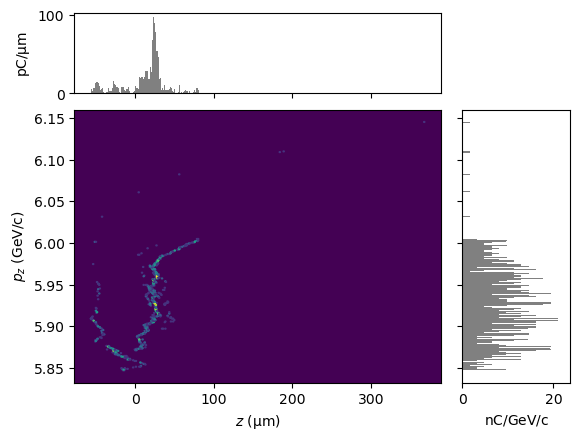




-36 -46
{'linearCompressionTerm': -0.015400000000000028, 'quadraticCompressionTerm': 0.14000000000000057, 'spacingUm': 49.963008125388704, 'driverLength': 1.004636550466883e-05, 'witnessLength': 2.706541106033485e-05, 'longestBunchLength': 2.706541106033485e-05}


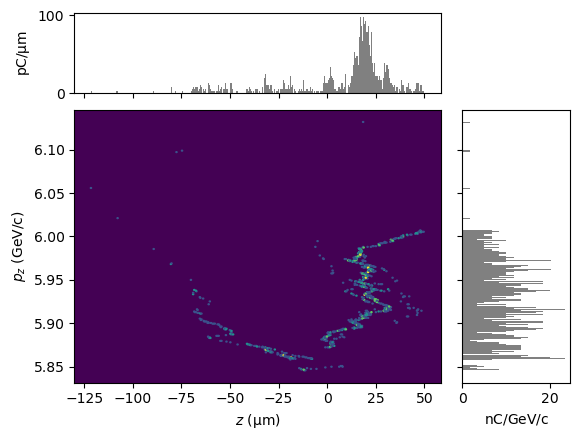




-36 -44
{'linearCompressionTerm': -0.01660000000000002, 'quadraticCompressionTerm': 0.1700000000000006, 'spacingUm': 49.66724413313186, 'driverLength': 1.1347294038182642e-05, 'witnessLength': 3.254894786557522e-05, 'longestBunchLength': 3.254894786557522e-05}


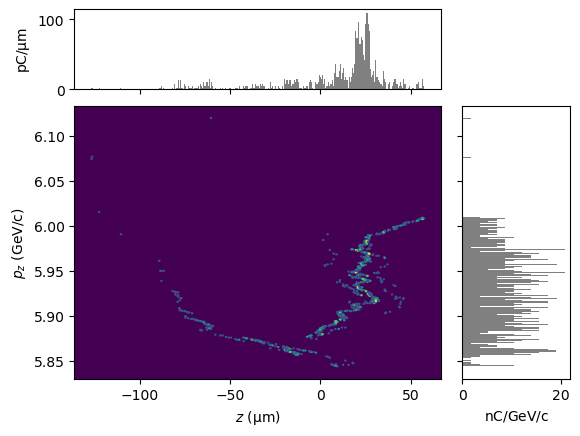




-36 -42



-36 -40
{'linearCompressionTerm': -0.02, 'quadraticCompressionTerm': 0.08000000000000052, 'spacingUm': 36.85255082808647, 'driverLength': 7.681727976655546e-06, 'witnessLength': 4.280918894271163e-05, 'longestBunchLength': 4.280918894271163e-05}


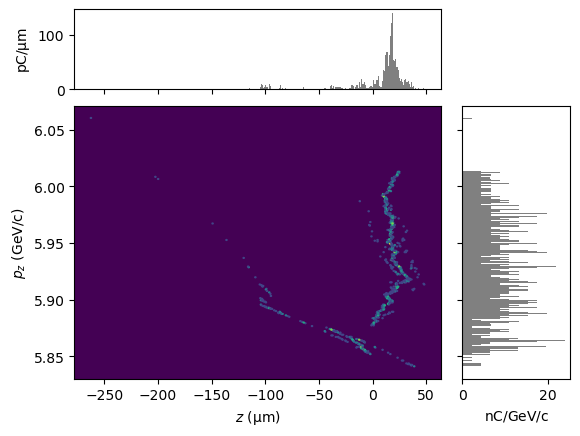




-36 -38
{'linearCompressionTerm': -0.02, 'quadraticCompressionTerm': 0.14000000000000057, 'spacingUm': 49.82420012240306, 'driverLength': 1.1506014818996795e-05, 'witnessLength': 4.8253045337053095e-05, 'longestBunchLength': 4.8253045337053095e-05}


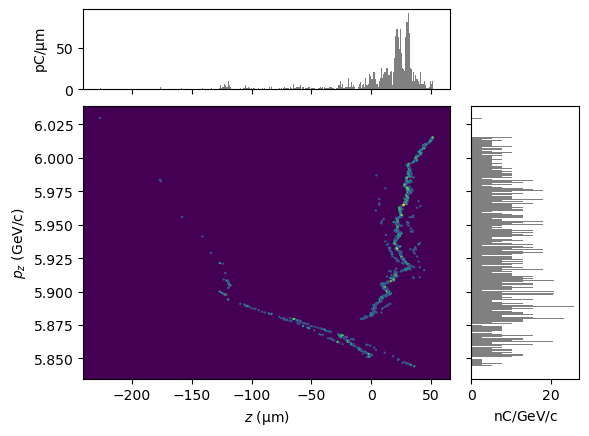




-36 -36
{'linearCompressionTerm': -0.02, 'quadraticCompressionTerm': 0.36000000000000076, 'spacingUm': 49.57018046398734, 'driverLength': 2.1712500065814364e-05, 'witnessLength': 5.301355420557155e-05, 'longestBunchLength': 5.301355420557155e-05}


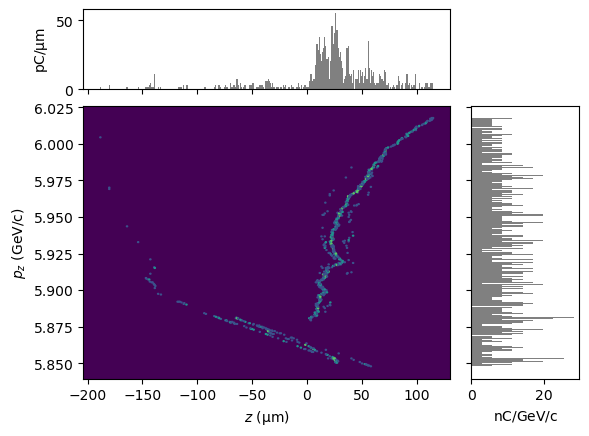




-36 -34
FAILED



-36 -32
FAILED



-36 -30
FAILED



-36 -28
FAILED



-36 -26
FAILED



-36 -24
FAILED



-36 -22
FAILED



-36 -20
FAILED



-36 -18
FAILED



-36 -16
FAILED



-36 -14
FAILED



-36 -12
FAILED



-36 -10
FAILED



-36 -8
FAILED



-36 -6
FAILED



-36 -4
FAILED



-36 -2
FAILED



-34 -50



-34 -48



-34 -46



-34 -44



-34 -42



-34 -40



-34 -38



-34 -36



-34 -34



-34 -32
{'linearCompressionTerm': -0.02, 'quadraticCompressionTerm': 0.11500000000000055, 'spacingUm': 32.152136772044585, 'driverLength': 3.460926825498023e-05, 'witnessLength': 3.466881741651171e-05, 'longestBunchLength': 3.466881741651171e-05}


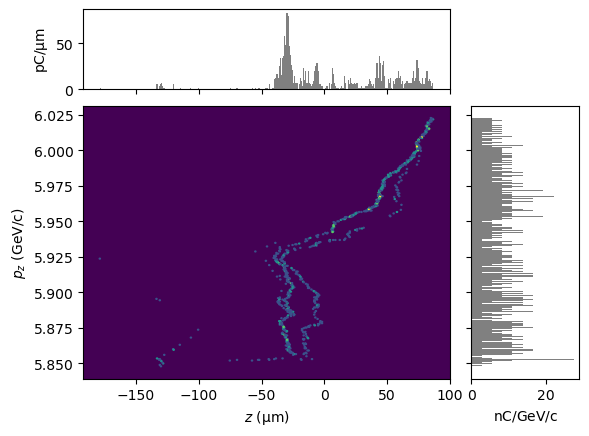




-34 -30
{'linearCompressionTerm': -0.02, 'quadraticCompressionTerm': 0.10500000000000054, 'spacingUm': 38.20278670351225, 'driverLength': 3.893347495376201e-05, 'witnessLength': 3.89535452859538e-05, 'longestBunchLength': 3.89535452859538e-05}


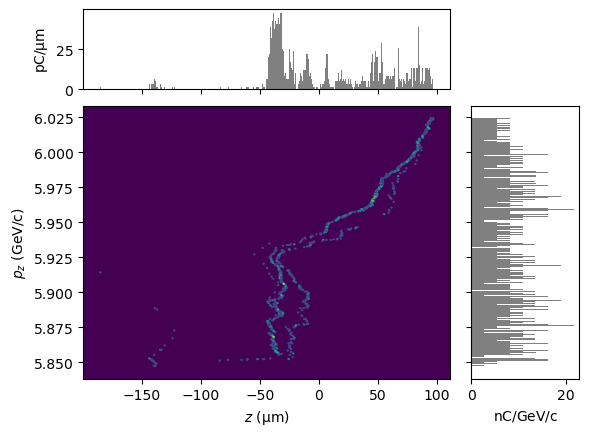




-34 -28
{'linearCompressionTerm': -0.02, 'quadraticCompressionTerm': 0.08500000000000052, 'spacingUm': 42.60332538579819, 'driverLength': 4.369528720294548e-05, 'witnessLength': 4.370441899074949e-05, 'longestBunchLength': 4.370441899074949e-05}


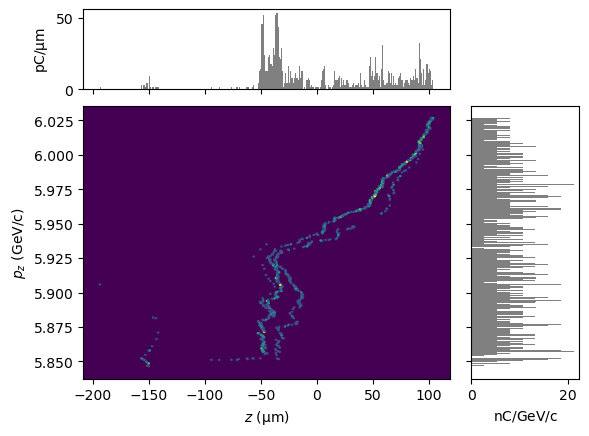




-34 -26
{'linearCompressionTerm': -0.02, 'quadraticCompressionTerm': 0.0650000000000005, 'spacingUm': 46.46753768170231, 'driverLength': 4.830202649489916e-05, 'witnessLength': 4.835205914053398e-05, 'longestBunchLength': 4.835205914053398e-05}


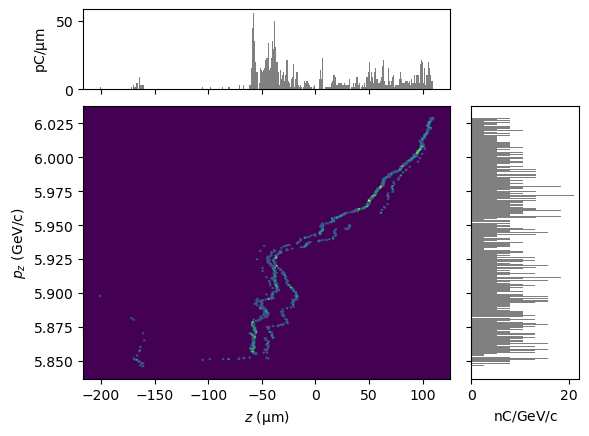




-34 -24
{'linearCompressionTerm': -0.02, 'quadraticCompressionTerm': 0.07500000000000051, 'spacingUm': 49.86420520011573, 'driverLength': 5.338571362735906e-05, 'witnessLength': 5.180184658016066e-05, 'longestBunchLength': 5.338571362735906e-05}


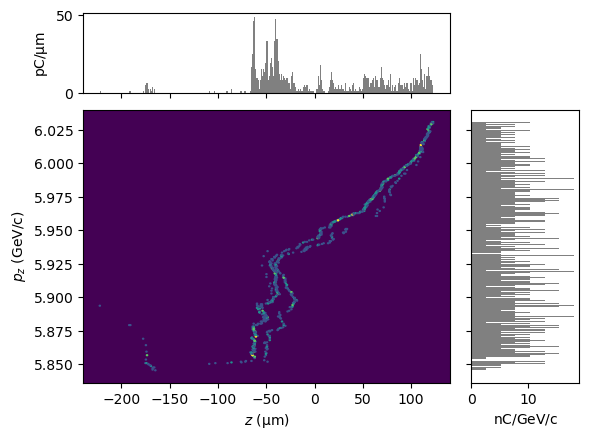




-34 -22
{'linearCompressionTerm': -0.02, 'quadraticCompressionTerm': 0.23500000000000065, 'spacingUm': 49.736040849561455, 'driverLength': 6.144657949013461e-05, 'witnessLength': 4.915298935271358e-05, 'longestBunchLength': 6.144657949013461e-05}


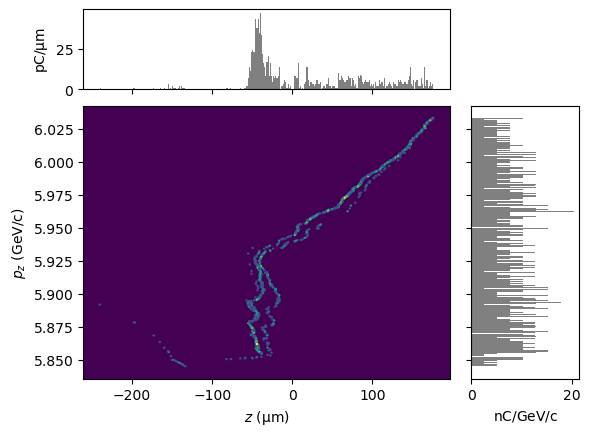




-34 -20
{'linearCompressionTerm': -0.02, 'quadraticCompressionTerm': 0.3050000000000007, 'spacingUm': 49.83120402188197, 'driverLength': 6.818149654121184e-05, 'witnessLength': 4.997727508557237e-05, 'longestBunchLength': 6.818149654121184e-05}


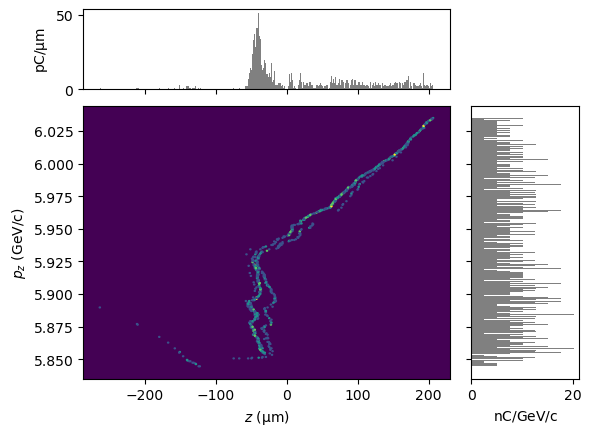




-34 -18
{'linearCompressionTerm': -0.02, 'quadraticCompressionTerm': 0.35000000000000075, 'spacingUm': 49.85272485120302, 'driverLength': 7.427291554204807e-05, 'witnessLength': 5.1559306528164456e-05, 'longestBunchLength': 7.427291554204807e-05}


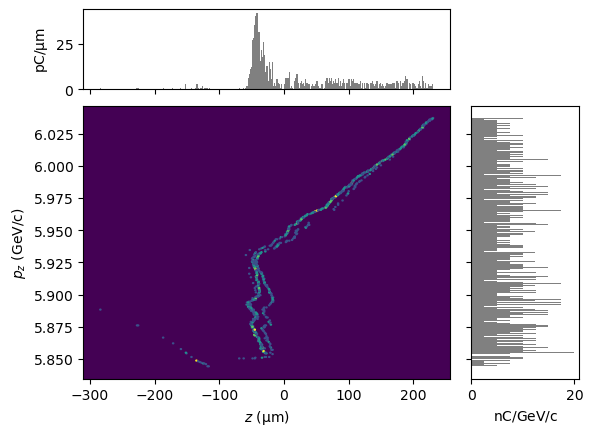




-34 -16
{'linearCompressionTerm': -0.02, 'quadraticCompressionTerm': 0.4100000000000008, 'spacingUm': 49.44858485638784, 'driverLength': 8.09177619597804e-05, 'witnessLength': 5.511056354902016e-05, 'longestBunchLength': 8.09177619597804e-05}


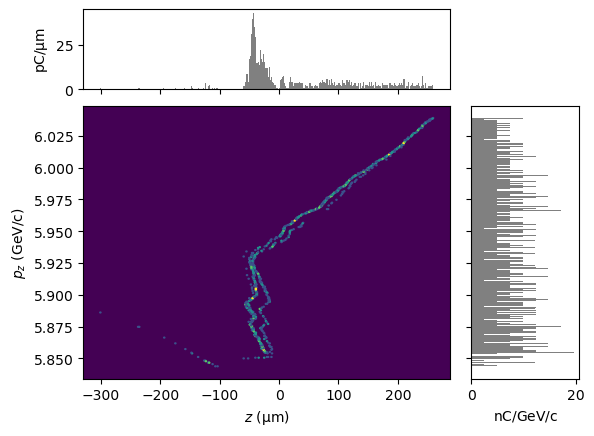




-34 -14
{'linearCompressionTerm': -0.02, 'quadraticCompressionTerm': 0.47000000000000086, 'spacingUm': 49.6674149082092, 'driverLength': 8.754676703815029e-05, 'witnessLength': 5.6568297842467945e-05, 'longestBunchLength': 8.754676703815029e-05}


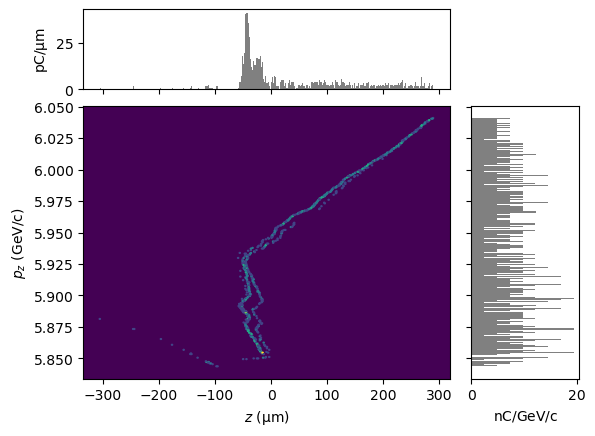




-34 -12
FAILED



-34 -10
FAILED



-34 -8
FAILED



-34 -6
FAILED



-34 -4
FAILED



-34 -2
FAILED



-32 -50



-32 -48



-32 -46



-32 -44



-32 -42



-32 -40



-32 -38



-32 -36



-32 -34



-32 -32



-32 -30



-32 -28



-32 -26



-32 -24



-32 -22



-32 -20



-32 -18



-32 -16



-32 -14



-32 -12



-32 -10



-32 -8



-32 -6



-32 -4



-32 -2



-30 -50



-30 -48



-30 -46



-30 -44



-30 -42



-30 -40



-30 -38



-30 -36



-30 -34



-30 -32



-30 -30



-30 -28



-30 -26



-30 -24



-30 -22



-30 -20



-30 -18



-30 -16



-30 -14



-30 -12



-30 -10



-30 -8



-30 -6



-30 -4



-30 -2



-28 -50



-28 -48



-28 -46



-28 -44



-28 -42



-28 -40



-28 -38



-28 -36



-28 -34



-28 -32



-28 -30



-28 -28



-28 -26



-28 -24



-28 -22



-28 -20



-28 -18



-28 -16



-28 -14



-28 -12



-28 -10



-28 -8



-28 -6



-28 -4



-28 -2



-26 -50



-26 -48



-26 -46



-26 -44



-26 -42



-26 -40



-26 -38



-26

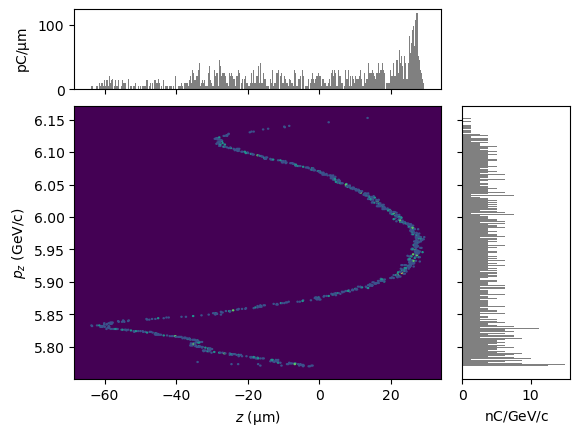




-24 -48
{'linearCompressionTerm': -0.01360000000000004, 'quadraticCompressionTerm': -0.019999999999999574, 'spacingUm': 44.97223300113548, 'driverLength': 1.5950171216414003e-05, 'witnessLength': 1.6191418872005835e-05, 'longestBunchLength': 1.6191418872005835e-05}


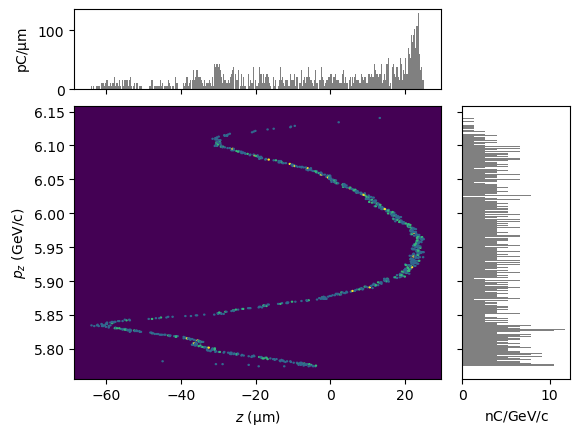




-24 -46
{'linearCompressionTerm': -0.011200000000000054, 'quadraticCompressionTerm': -0.029999999999999583, 'spacingUm': 46.75743779817822, 'driverLength': 1.4576542889155284e-05, 'witnessLength': 1.5235472723187693e-05, 'longestBunchLength': 1.5235472723187693e-05}


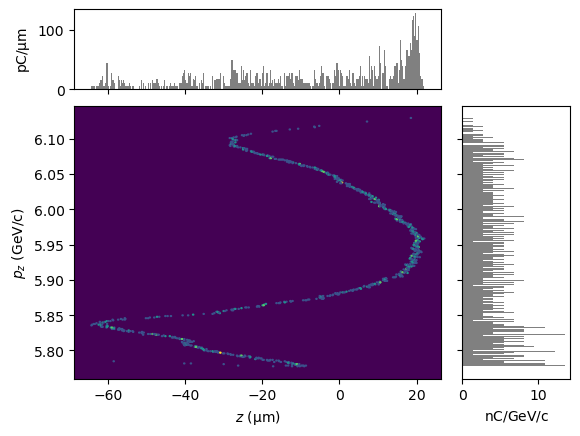




-24 -44
{'linearCompressionTerm': -0.008800000000000068, 'quadraticCompressionTerm': -0.03999999999999959, 'spacingUm': 47.882676866980326, 'driverLength': 1.3375406319677973e-05, 'witnessLength': 1.2884540077359918e-05, 'longestBunchLength': 1.3375406319677973e-05}


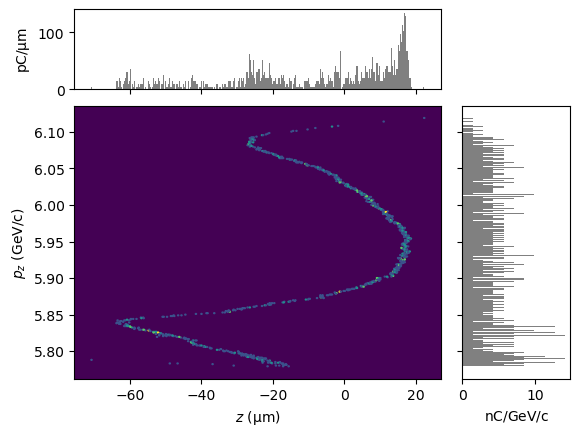




-24 -42
{'linearCompressionTerm': -0.006400000000000083, 'quadraticCompressionTerm': -0.029999999999999583, 'spacingUm': 42.05676042761704, 'driverLength': 9.06180757778506e-06, 'witnessLength': 8.82308975231119e-06, 'longestBunchLength': 9.06180757778506e-06}


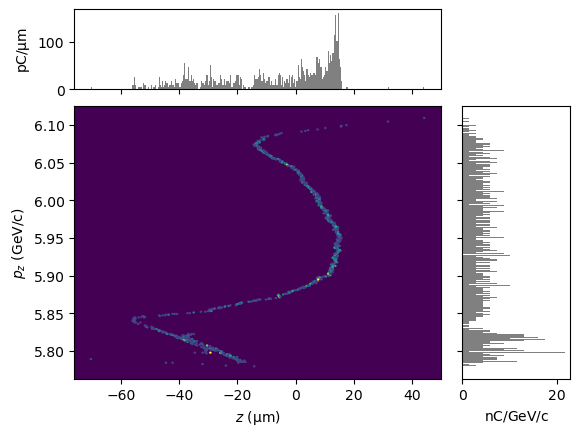




-24 -40



-24 -38



-24 -36



-24 -34



-24 -32



-24 -30



-24 -28



-24 -26



-24 -24



-24 -22



-24 -20



-24 -18



-24 -16



-24 -14



-24 -12



-24 -10



-24 -8



-24 -6



-24 -4



-24 -2



-22 -50
{'linearCompressionTerm': -0.017800000000000014, 'quadraticCompressionTerm': 0.05500000000000049, 'spacingUm': 49.12356105373125, 'driverLength': 8.605632708955706e-06, 'witnessLength': 1.1036926149175364e-05, 'longestBunchLength': 1.1036926149175364e-05}


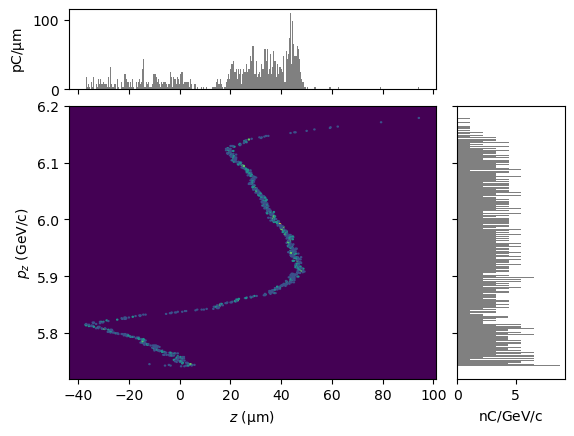




-22 -48
{'linearCompressionTerm': -0.015600000000000027, 'quadraticCompressionTerm': 0.045000000000000484, 'spacingUm': 49.42983161338412, 'driverLength': 9.260381620712161e-06, 'witnessLength': 1.06977100888243e-05, 'longestBunchLength': 1.06977100888243e-05}


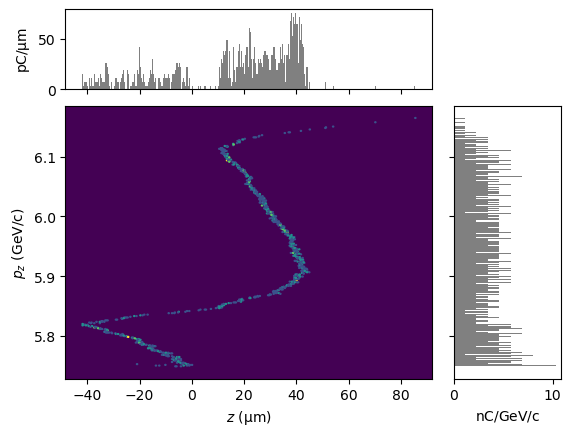




-22 -46
{'linearCompressionTerm': -0.01340000000000004, 'quadraticCompressionTerm': 0.035000000000000475, 'spacingUm': 46.929942398564485, 'driverLength': 1.0142089764338131e-05, 'witnessLength': 1.0789281616363441e-05, 'longestBunchLength': 1.0789281616363441e-05}


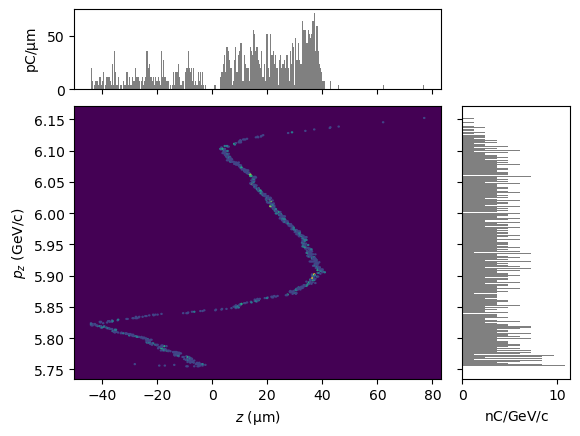




-22 -44
{'linearCompressionTerm': -0.011000000000000055, 'quadraticCompressionTerm': 0.025000000000000466, 'spacingUm': 47.882264879502785, 'driverLength': 9.788488843605207e-06, 'witnessLength': 1.044755267225869e-05, 'longestBunchLength': 1.044755267225869e-05}


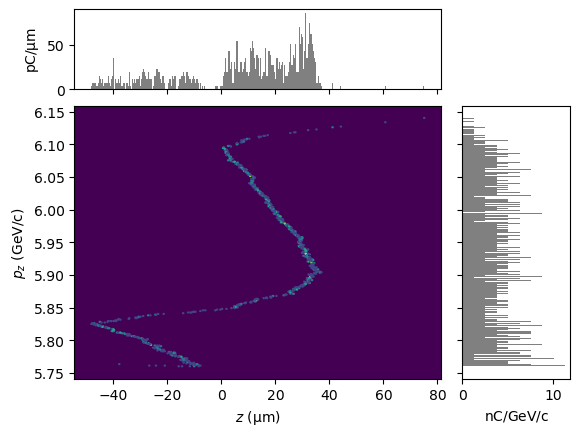




-22 -42
{'linearCompressionTerm': -0.00860000000000007, 'quadraticCompressionTerm': 0.015000000000000457, 'spacingUm': 47.03138194150298, 'driverLength': 9.711344569877634e-06, 'witnessLength': 1.011820893601459e-05, 'longestBunchLength': 1.011820893601459e-05}


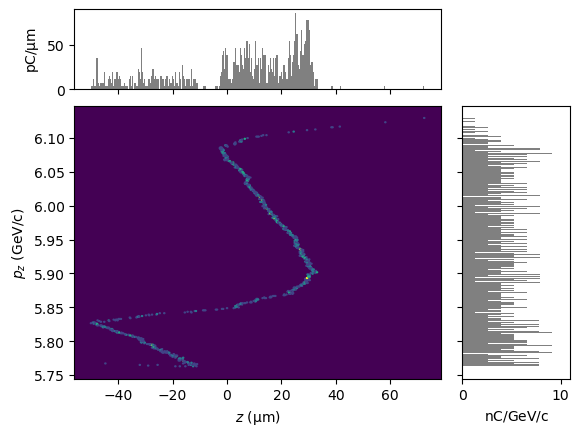




-22 -40
{'linearCompressionTerm': -0.006000000000000085, 'quadraticCompressionTerm': 0.0050000000000004485, 'spacingUm': 49.221586695486934, 'driverLength': 8.269018198287749e-06, 'witnessLength': 9.314246380715918e-06, 'longestBunchLength': 9.314246380715918e-06}


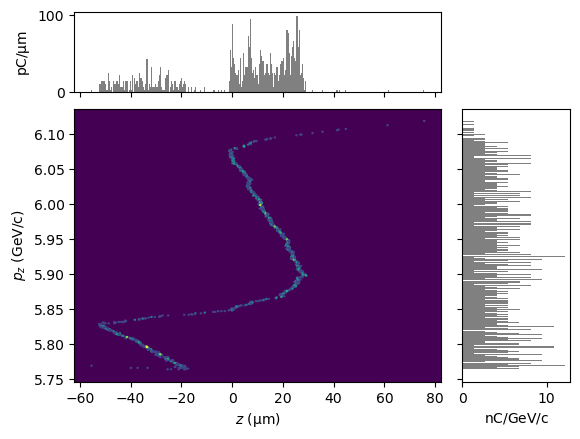




-22 -38
{'linearCompressionTerm': -0.003400000000000101, 'quadraticCompressionTerm': 4.440892098500626e-16, 'spacingUm': 49.756790667911524, 'driverLength': 6.370397505049984e-06, 'witnessLength': 7.567285589900409e-06, 'longestBunchLength': 7.567285589900409e-06}


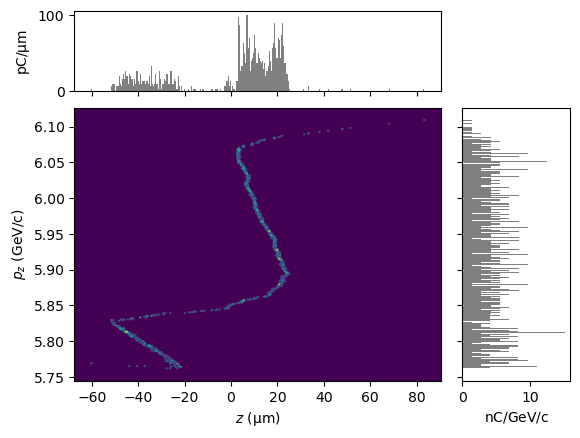




-22 -36



-22 -34



-22 -32



-22 -30



-22 -28



-22 -26



-22 -24



-22 -22



-22 -20



-22 -18



-22 -16



-22 -14



-22 -12



-22 -10



-22 -8



-22 -6



-22 -4



-22 -2



-20 -50
{'linearCompressionTerm': -0.019400000000000004, 'quadraticCompressionTerm': 0.08000000000000052, 'spacingUm': 49.59440133218971, 'driverLength': 9.025469855602444e-06, 'witnessLength': 8.371671252533345e-06, 'longestBunchLength': 9.025469855602444e-06}


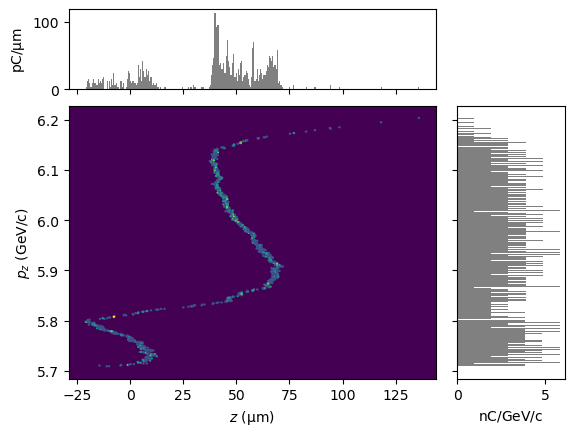




-20 -48
{'linearCompressionTerm': -0.017200000000000017, 'quadraticCompressionTerm': 0.08000000000000052, 'spacingUm': 47.660620427289665, 'driverLength': 8.029453434530971e-06, 'witnessLength': 8.92936208341546e-06, 'longestBunchLength': 8.92936208341546e-06}


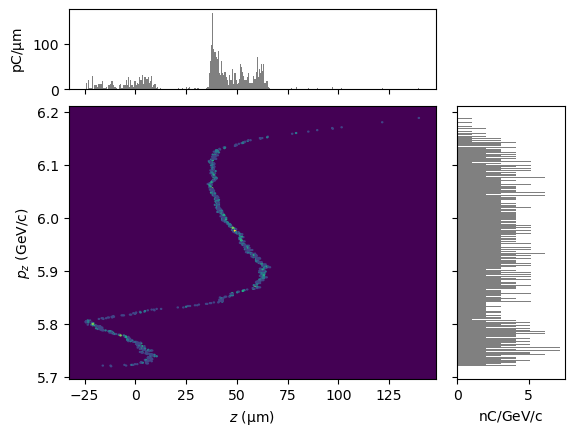




-20 -46
{'linearCompressionTerm': -0.01500000000000003, 'quadraticCompressionTerm': 0.07500000000000051, 'spacingUm': 45.26214096303389, 'driverLength': 8.559154971996692e-06, 'witnessLength': 9.126550337426935e-06, 'longestBunchLength': 9.126550337426935e-06}


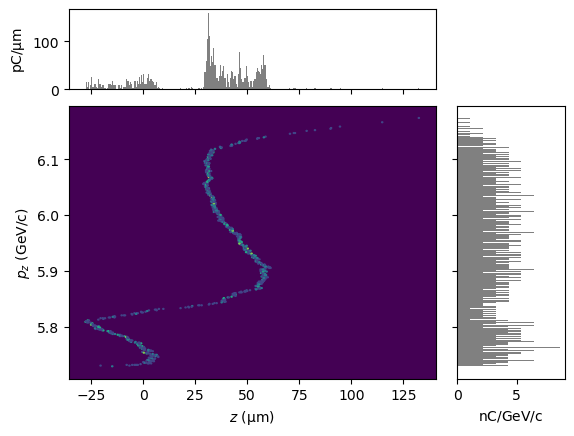




-20 -44
{'linearCompressionTerm': -0.012600000000000045, 'quadraticCompressionTerm': 0.0650000000000005, 'spacingUm': 49.20324067696607, 'driverLength': 8.6611555740776e-06, 'witnessLength': 8.350878319891547e-06, 'longestBunchLength': 8.6611555740776e-06}


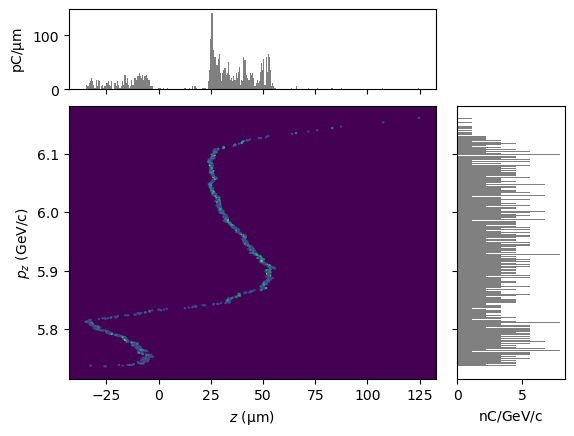




-20 -42
{'linearCompressionTerm': -0.01020000000000006, 'quadraticCompressionTerm': 0.0600000000000005, 'spacingUm': 47.6207226054337, 'driverLength': 8.526332924107942e-06, 'witnessLength': 8.551096784390496e-06, 'longestBunchLength': 8.551096784390496e-06}


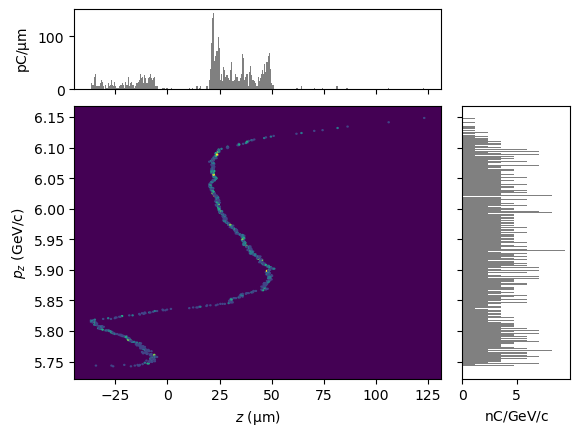




-20 -40
{'linearCompressionTerm': -0.0076000000000000754, 'quadraticCompressionTerm': 0.05500000000000049, 'spacingUm': 48.09649409965011, 'driverLength': 7.518273161437881e-06, 'witnessLength': 8.35743771514566e-06, 'longestBunchLength': 8.35743771514566e-06}


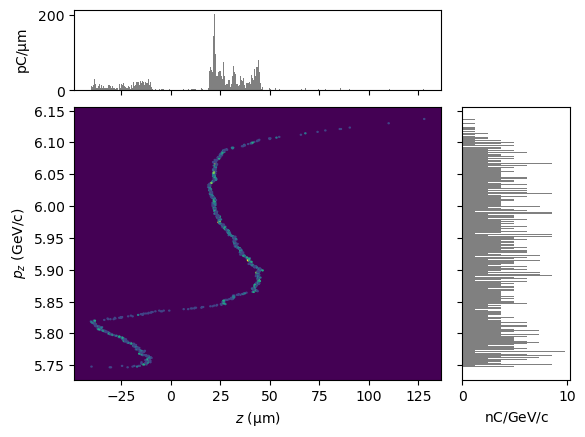




-20 -38
{'linearCompressionTerm': -0.005000000000000091, 'quadraticCompressionTerm': 0.045000000000000484, 'spacingUm': 48.89501320457618, 'driverLength': 7.192583177467059e-06, 'witnessLength': 7.737942988033314e-06, 'longestBunchLength': 7.737942988033314e-06}


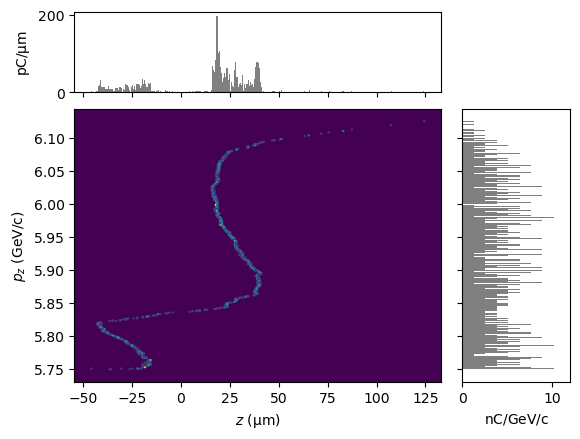




-20 -36
{'linearCompressionTerm': -0.002400000000000107, 'quadraticCompressionTerm': 0.035000000000000475, 'spacingUm': 48.98024510559623, 'driverLength': 6.702257276842483e-06, 'witnessLength': 7.161055949262921e-06, 'longestBunchLength': 7.161055949262921e-06}


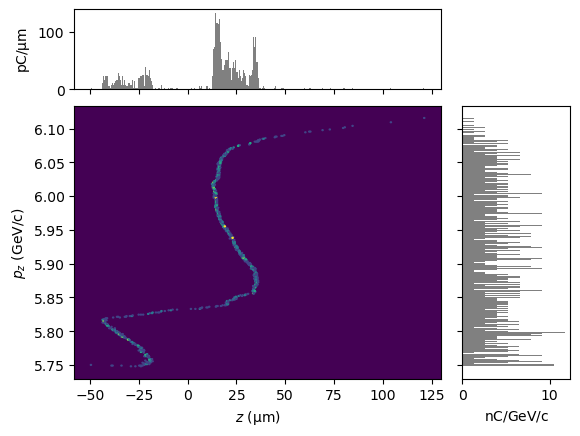




-20 -34



-20 -32



-20 -30



-20 -28



-20 -26



-20 -24



-20 -22



-20 -20



-20 -18



-20 -16



-20 -14



-20 -12



-20 -10



-20 -8



-20 -6



-20 -4



-20 -2



-18 -50
{'linearCompressionTerm': -0.02, 'quadraticCompressionTerm': 0.13500000000000056, 'spacingUm': 48.802420297210475, 'driverLength': 2.0233864237893575e-05, 'witnessLength': 1.5405019395105387e-05, 'longestBunchLength': 2.0233864237893575e-05}


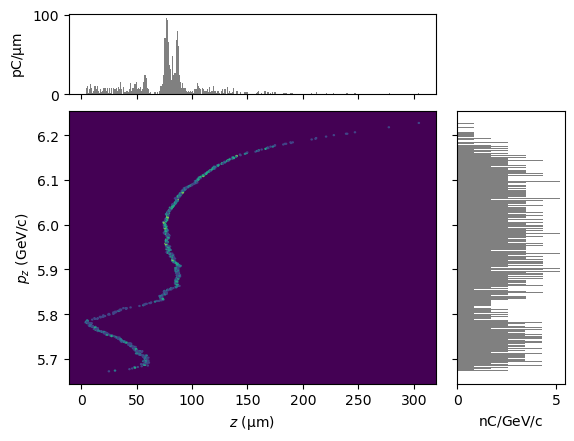




-18 -48
{'linearCompressionTerm': -0.01840000000000001, 'quadraticCompressionTerm': 0.10500000000000054, 'spacingUm': 49.24305727051079, 'driverLength': 9.007919294063203e-06, 'witnessLength': 1.0137986676536147e-05, 'longestBunchLength': 1.0137986676536147e-05}


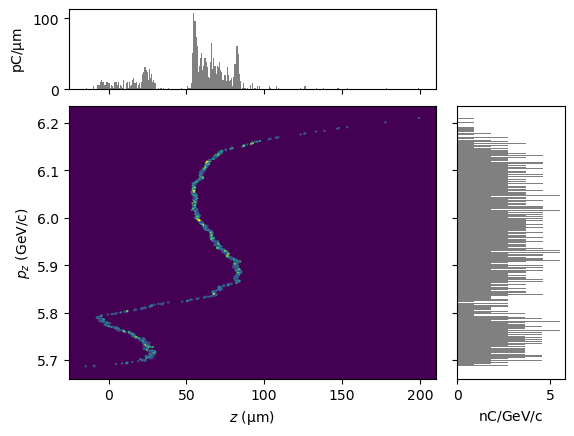




-18 -46
{'linearCompressionTerm': -0.016200000000000023, 'quadraticCompressionTerm': 0.10500000000000054, 'spacingUm': 46.92261008295982, 'driverLength': 9.175018503653927e-06, 'witnessLength': 1.0339950514281947e-05, 'longestBunchLength': 1.0339950514281947e-05}


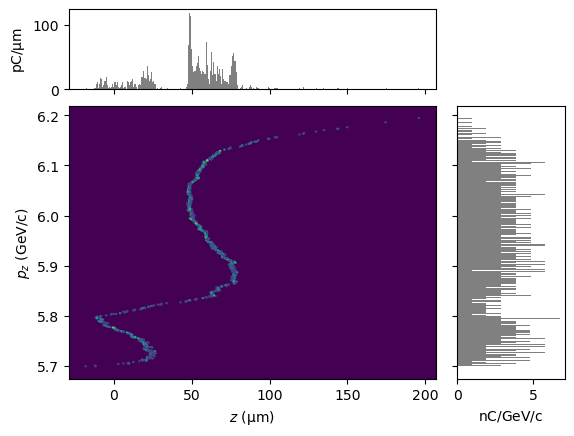




-18 -44
{'linearCompressionTerm': -0.014000000000000037, 'quadraticCompressionTerm': 0.10000000000000053, 'spacingUm': 43.566287150635894, 'driverLength': 1.0322574793360136e-05, 'witnessLength': 1.013968223590451e-05, 'longestBunchLength': 1.0322574793360136e-05}


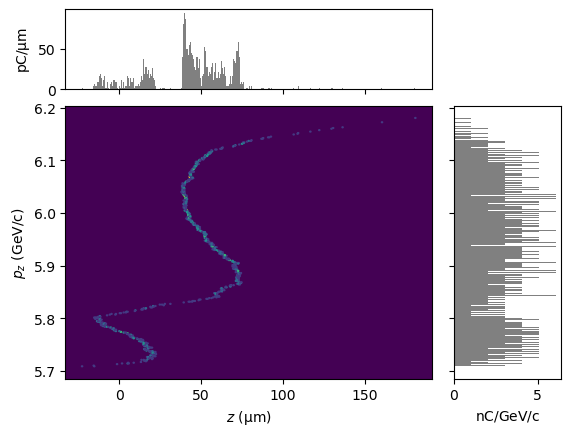




-18 -42
{'linearCompressionTerm': -0.011400000000000052, 'quadraticCompressionTerm': 0.10000000000000053, 'spacingUm': 48.41482935884297, 'driverLength': 8.859479511922139e-06, 'witnessLength': 9.97188493430925e-06, 'longestBunchLength': 9.97188493430925e-06}


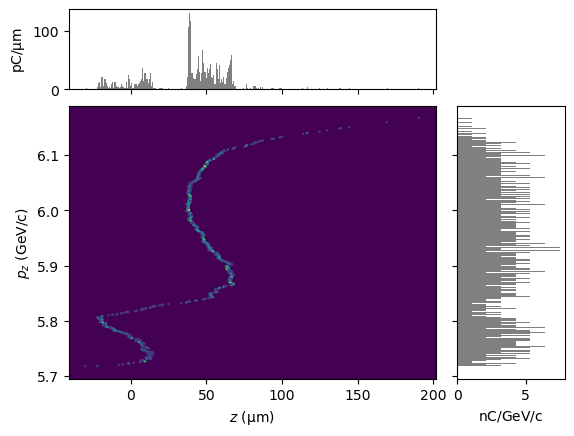




-18 -40
{'linearCompressionTerm': -0.009000000000000067, 'quadraticCompressionTerm': 0.09000000000000052, 'spacingUm': 46.326280329945384, 'driverLength': 9.87305656964332e-06, 'witnessLength': 9.338450849895545e-06, 'longestBunchLength': 9.87305656964332e-06}


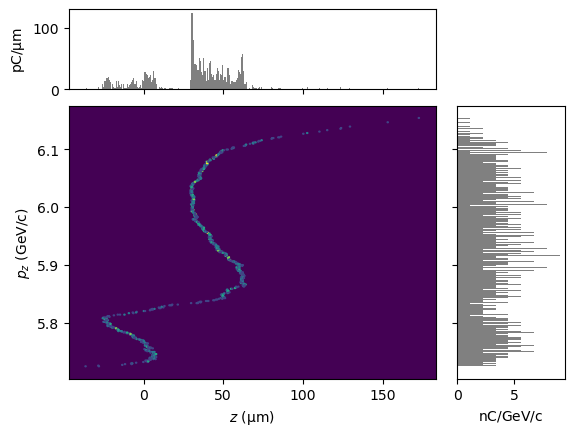




-18 -38
{'linearCompressionTerm': -0.006400000000000083, 'quadraticCompressionTerm': 0.08500000000000052, 'spacingUm': 44.99547337410889, 'driverLength': 9.616841990390222e-06, 'witnessLength': 9.188876161325589e-06, 'longestBunchLength': 9.616841990390222e-06}


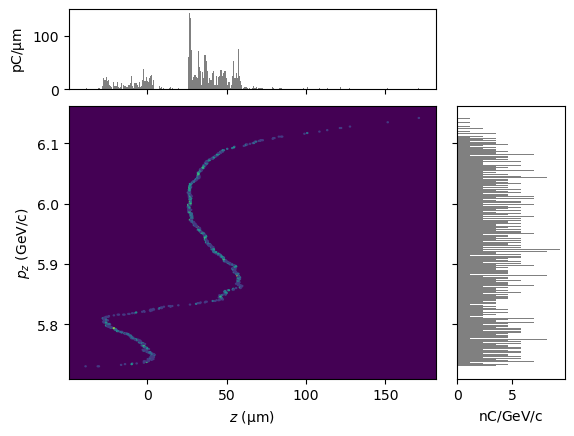




-18 -36
{'linearCompressionTerm': -0.0036000000000000996, 'quadraticCompressionTerm': 0.07500000000000051, 'spacingUm': 49.30149034302692, 'driverLength': 8.698063837092758e-06, 'witnessLength': 8.005430760120264e-06, 'longestBunchLength': 8.698063837092758e-06}


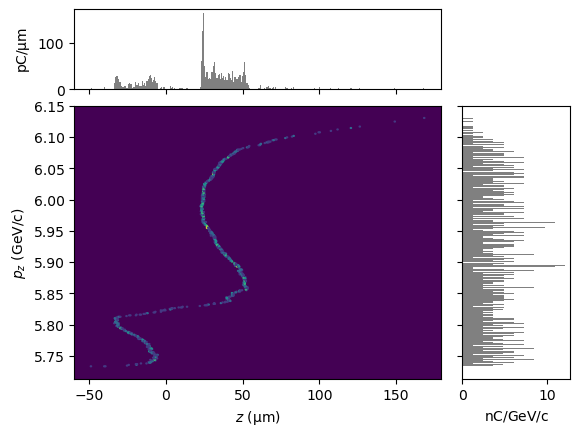




-18 -34
{'linearCompressionTerm': -0.0012000000000001142, 'quadraticCompressionTerm': 0.035000000000000475, 'spacingUm': 48.51174211863755, 'driverLength': 5.6363839011947726e-06, 'witnessLength': 4.7387373535278865e-06, 'longestBunchLength': 5.6363839011947726e-06}


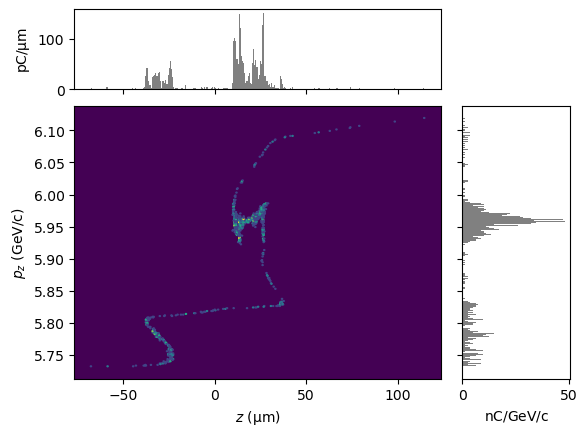




-18 -32



-18 -30



-18 -28



-18 -26



-18 -24



-18 -22



-18 -20



-18 -18



-18 -16



-18 -14



-18 -12



-18 -10



-18 -8



-18 -6



-18 -4



-18 -2



-16 -50
{'linearCompressionTerm': -0.02, 'quadraticCompressionTerm': 0.1700000000000006, 'spacingUm': 49.16878669235395, 'driverLength': 4.885417222965863e-05, 'witnessLength': 2.2455103939143704e-05, 'longestBunchLength': 4.885417222965863e-05}


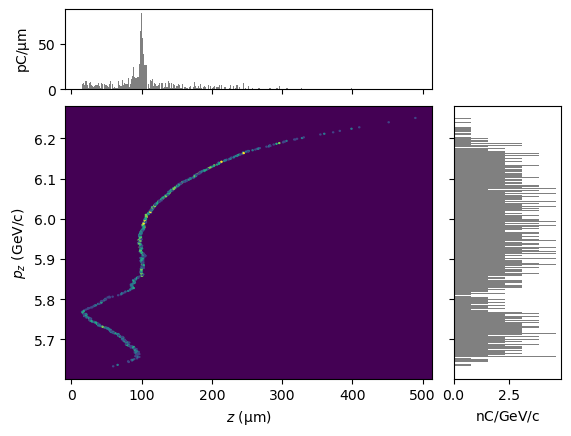




-16 -48
{'linearCompressionTerm': -0.019400000000000004, 'quadraticCompressionTerm': 0.11500000000000055, 'spacingUm': 48.639304977788896, 'driverLength': 1.0882731640277526e-05, 'witnessLength': 1.0234634922677579e-05, 'longestBunchLength': 1.0882731640277526e-05}


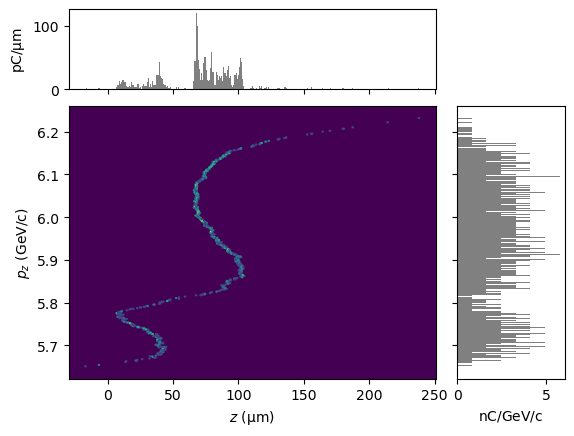




-16 -46
{'linearCompressionTerm': -0.017200000000000017, 'quadraticCompressionTerm': 0.11500000000000055, 'spacingUm': 49.02174527444243, 'driverLength': 1.101578293204746e-05, 'witnessLength': 9.990613165485865e-06, 'longestBunchLength': 1.101578293204746e-05}


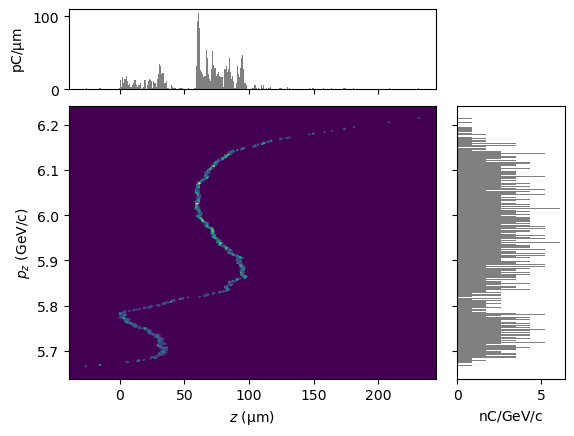




-16 -44
{'linearCompressionTerm': -0.014800000000000032, 'quadraticCompressionTerm': 0.12500000000000056, 'spacingUm': 46.97071721542501, 'driverLength': 1.0970197566906726e-05, 'witnessLength': 1.155468475363347e-05, 'longestBunchLength': 1.155468475363347e-05}


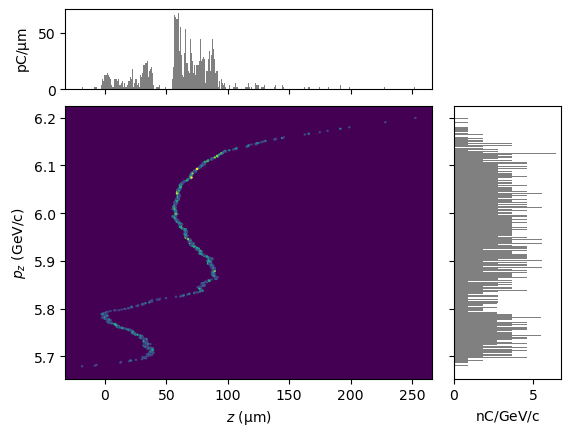




-16 -42
{'linearCompressionTerm': -0.012400000000000046, 'quadraticCompressionTerm': 0.12000000000000055, 'spacingUm': 48.78518541657901, 'driverLength': 1.084168370161776e-05, 'witnessLength': 1.0658104287635495e-05, 'longestBunchLength': 1.084168370161776e-05}


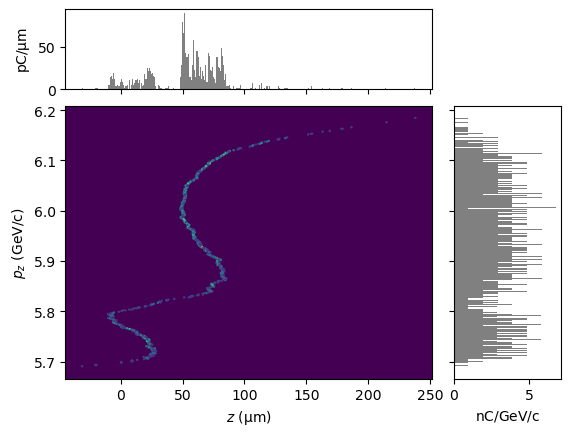




-16 -40
{'linearCompressionTerm': -0.010000000000000061, 'quadraticCompressionTerm': 0.11500000000000055, 'spacingUm': 47.00393509311991, 'driverLength': 1.1213452186815357e-05, 'witnessLength': 1.02338911143605e-05, 'longestBunchLength': 1.1213452186815357e-05}


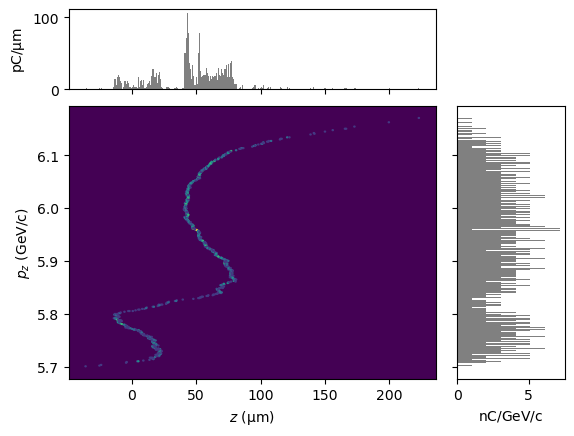




-16 -38
{'linearCompressionTerm': -0.007400000000000077, 'quadraticCompressionTerm': 0.11000000000000054, 'spacingUm': 46.843343697424736, 'driverLength': 1.1341490548664046e-05, 'witnessLength': 9.909054626815257e-06, 'longestBunchLength': 1.1341490548664046e-05}


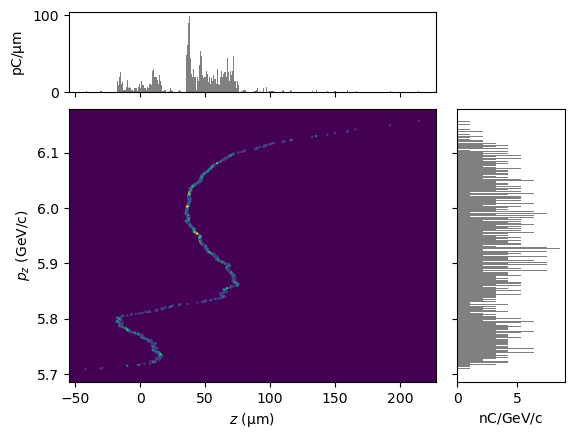




-16 -36
{'linearCompressionTerm': -0.004600000000000094, 'quadraticCompressionTerm': 0.10500000000000054, 'spacingUm': 48.80521957287945, 'driverLength': 1.11687829240273e-05, 'witnessLength': 9.166466453060867e-06, 'longestBunchLength': 1.11687829240273e-05}


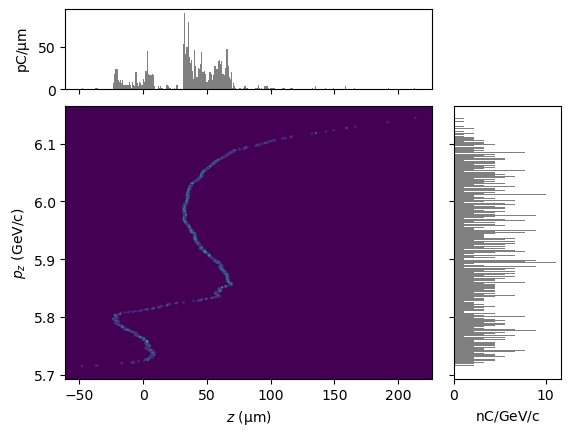




-16 -34
{'linearCompressionTerm': -0.0018000000000001105, 'quadraticCompressionTerm': 0.08000000000000052, 'spacingUm': 49.486943841610355, 'driverLength': 8.763463286139583e-06, 'witnessLength': 6.2931276924640275e-06, 'longestBunchLength': 8.763463286139583e-06}


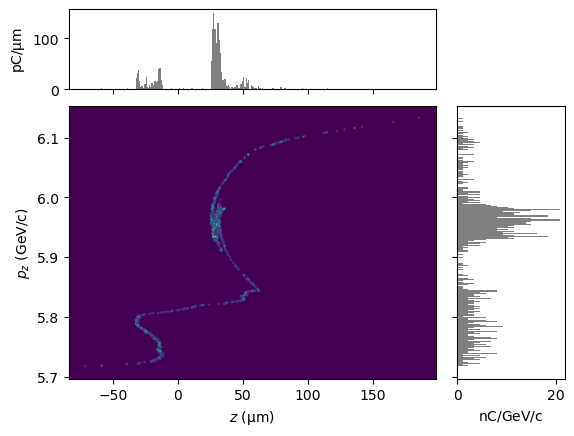




-16 -32



-16 -30



-16 -28



-16 -26



-16 -24



-16 -22



-16 -20



-16 -18



-16 -16



-16 -14



-16 -12



-16 -10



-16 -8



-16 -6



-16 -4



-16 -2



-14 -50
{'linearCompressionTerm': -0.02, 'quadraticCompressionTerm': 0.20000000000000062, 'spacingUm': 46.75773524028462, 'driverLength': 7.831202594809996e-05, 'witnessLength': 3.4680470286342706e-05, 'longestBunchLength': 7.831202594809996e-05}


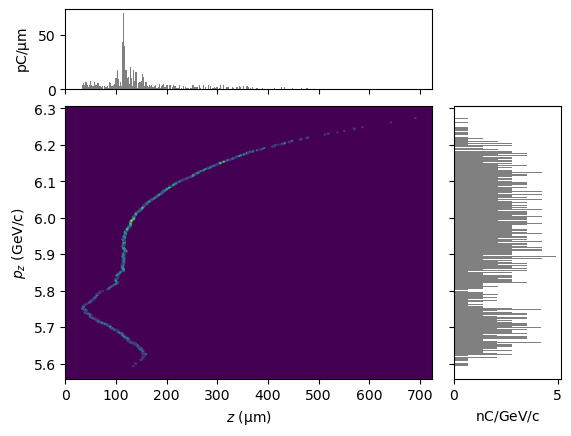




-14 -48
{'linearCompressionTerm': -0.02, 'quadraticCompressionTerm': 0.13500000000000056, 'spacingUm': 46.20147613389746, 'driverLength': 1.560883604956695e-05, 'witnessLength': 1.441178941757547e-05, 'longestBunchLength': 1.560883604956695e-05}


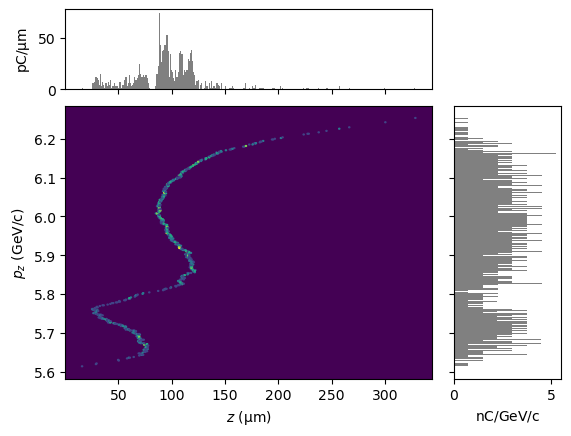




-14 -46
{'linearCompressionTerm': -0.018000000000000013, 'quadraticCompressionTerm': 0.12500000000000056, 'spacingUm': 48.75828705733516, 'driverLength': 1.2274591391554061e-05, 'witnessLength': 1.093428878170673e-05, 'longestBunchLength': 1.2274591391554061e-05}


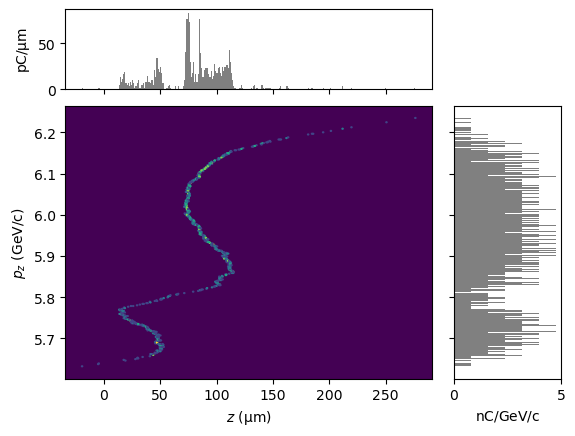




-14 -44
{'linearCompressionTerm': -0.015800000000000026, 'quadraticCompressionTerm': 0.12500000000000056, 'spacingUm': 46.47534617442461, 'driverLength': 1.290438953833801e-05, 'witnessLength': 1.067894901523595e-05, 'longestBunchLength': 1.290438953833801e-05}


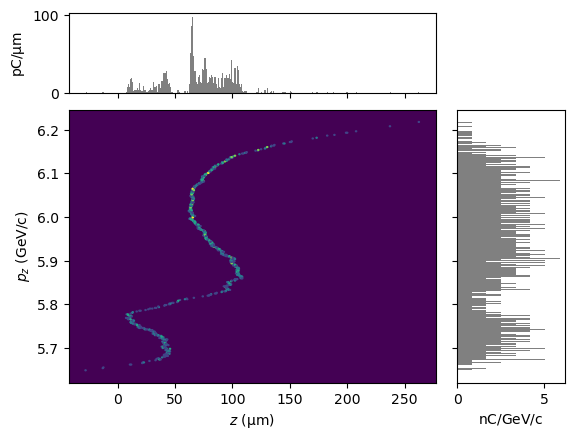




-14 -42
{'linearCompressionTerm': -0.01340000000000004, 'quadraticCompressionTerm': 0.12500000000000056, 'spacingUm': 47.473473563556745, 'driverLength': 1.2924619425093341e-05, 'witnessLength': 1.0479251481058838e-05, 'longestBunchLength': 1.2924619425093341e-05}


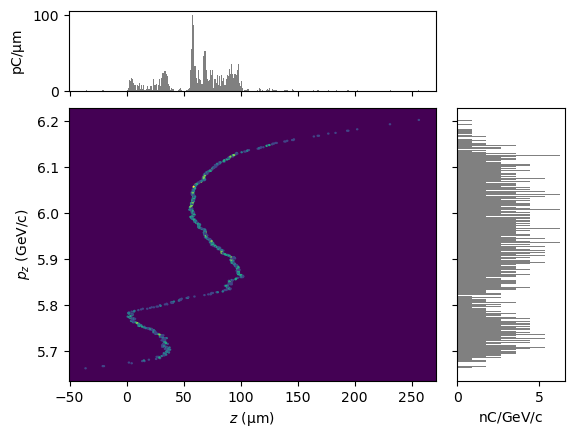




-14 -40
{'linearCompressionTerm': -0.010800000000000056, 'quadraticCompressionTerm': 0.13000000000000056, 'spacingUm': 47.824704852586585, 'driverLength': 1.3097193515512705e-05, 'witnessLength': 1.1000842215962107e-05, 'longestBunchLength': 1.3097193515512705e-05}


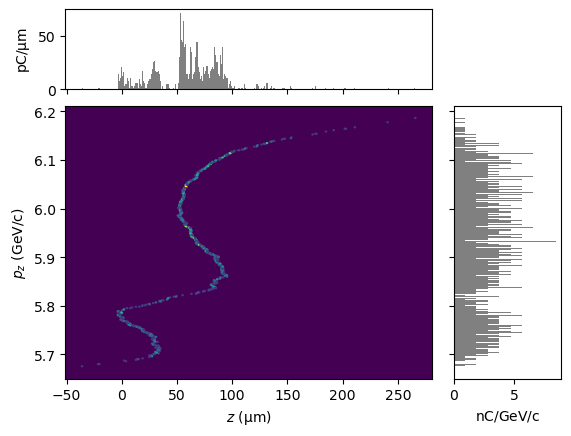




-14 -38
{'linearCompressionTerm': -0.008200000000000072, 'quadraticCompressionTerm': 0.12500000000000056, 'spacingUm': 48.903079000811466, 'driverLength': 1.3269813001513275e-05, 'witnessLength': 1.0122263141673659e-05, 'longestBunchLength': 1.3269813001513275e-05}


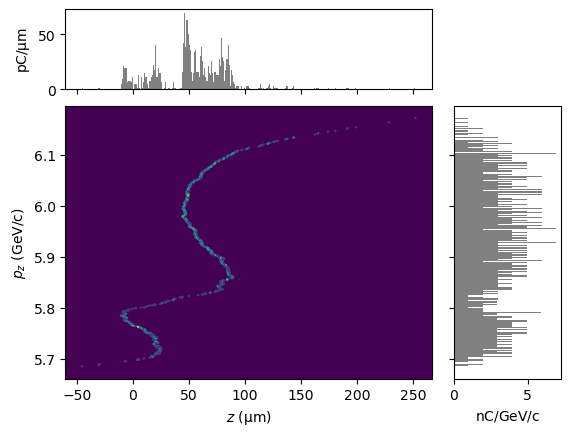




-14 -36
{'linearCompressionTerm': -0.0056000000000000875, 'quadraticCompressionTerm': 0.11500000000000055, 'spacingUm': 47.624961389014395, 'driverLength': 1.3227422747641454e-05, 'witnessLength': 8.89985302165934e-06, 'longestBunchLength': 1.3227422747641454e-05}


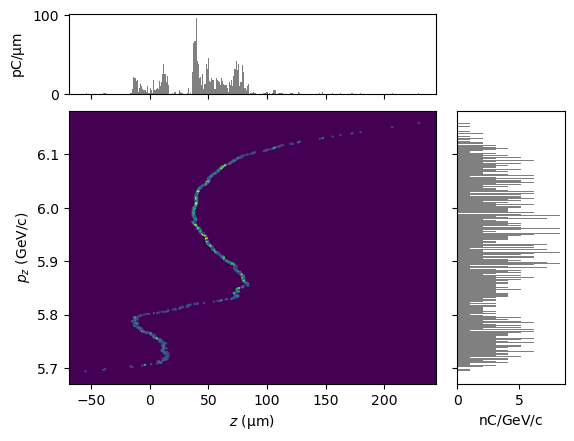




-14 -34
{'linearCompressionTerm': -0.0028000000000001045, 'quadraticCompressionTerm': 0.10500000000000054, 'spacingUm': 47.53196816267591, 'driverLength': 1.2894294802175471e-05, 'witnessLength': 7.841875385424172e-06, 'longestBunchLength': 1.2894294802175471e-05}


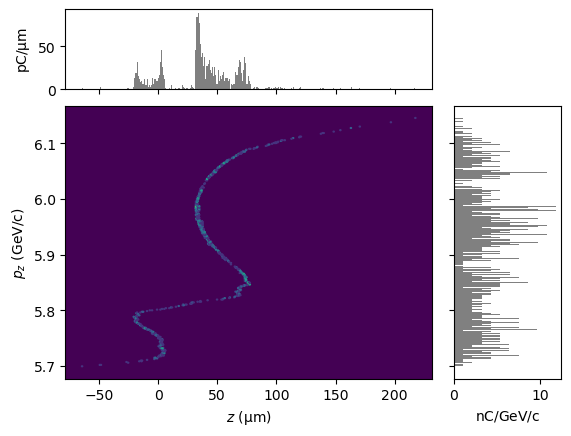




-14 -32



-14 -30



-14 -28



-14 -26



-14 -24



-14 -22



-14 -20



-14 -18



-14 -16



-14 -14



-14 -12



-14 -10



-14 -8



-14 -6



-14 -4



-14 -2



-12 -50
{'linearCompressionTerm': -0.02, 'quadraticCompressionTerm': 0.22000000000000064, 'spacingUm': 44.07404404790273, 'driverLength': 0.00010568754481608438, 'witnessLength': 4.899480616625339e-05, 'longestBunchLength': 0.00010568754481608438}


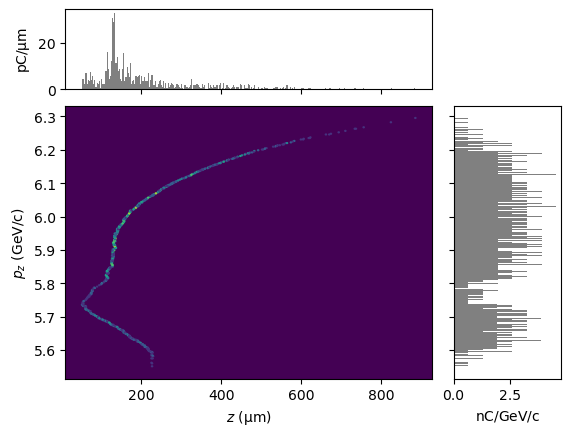




-12 -48
{'linearCompressionTerm': -0.02, 'quadraticCompressionTerm': 0.1600000000000006, 'spacingUm': 47.0627591023414, 'driverLength': 3.5072467024498324e-05, 'witnessLength': 2.194759156010178e-05, 'longestBunchLength': 3.5072467024498324e-05}


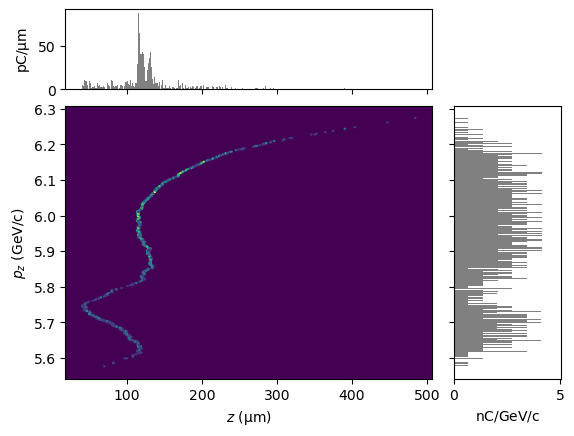




-12 -46
{'linearCompressionTerm': -0.018800000000000008, 'quadraticCompressionTerm': 0.13000000000000056, 'spacingUm': 43.90348395541963, 'driverLength': 1.4033534671827103e-05, 'witnessLength': 1.2100700203111093e-05, 'longestBunchLength': 1.4033534671827103e-05}


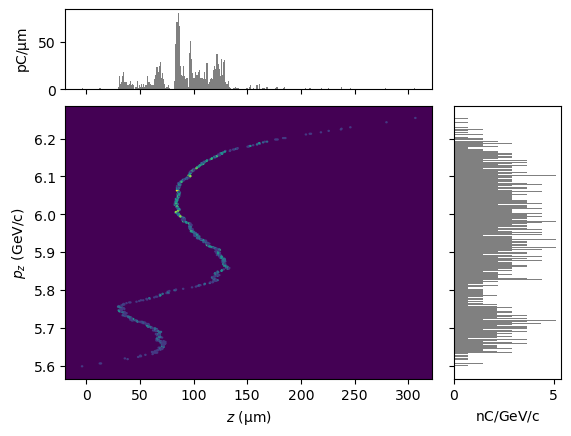




-12 -44
{'linearCompressionTerm': -0.016400000000000022, 'quadraticCompressionTerm': 0.13500000000000056, 'spacingUm': 48.21038187898212, 'driverLength': 1.4227337629492186e-05, 'witnessLength': 1.1814405489805086e-05, 'longestBunchLength': 1.4227337629492186e-05}


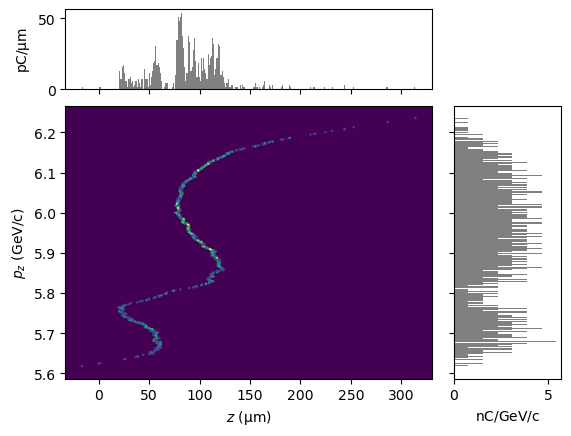




-12 -42
{'linearCompressionTerm': -0.014200000000000036, 'quadraticCompressionTerm': 0.13500000000000056, 'spacingUm': 42.494171678079674, 'driverLength': 1.4532580636614497e-05, 'witnessLength': 1.1637136110877737e-05, 'longestBunchLength': 1.4532580636614497e-05}


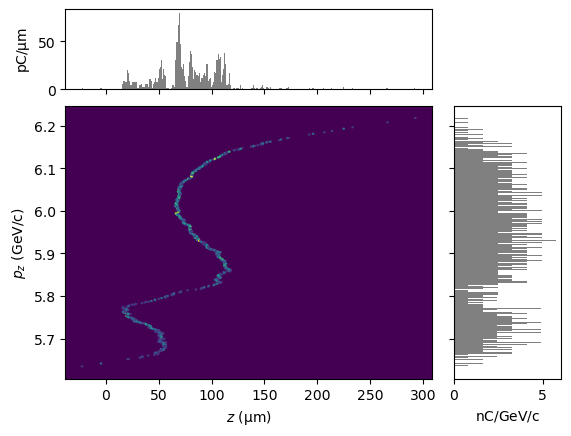




-12 -40
{'linearCompressionTerm': -0.011600000000000051, 'quadraticCompressionTerm': 0.13500000000000056, 'spacingUm': 46.78149782801356, 'driverLength': 1.4527697379886938e-05, 'witnessLength': 1.0895175472247477e-05, 'longestBunchLength': 1.4527697379886938e-05}


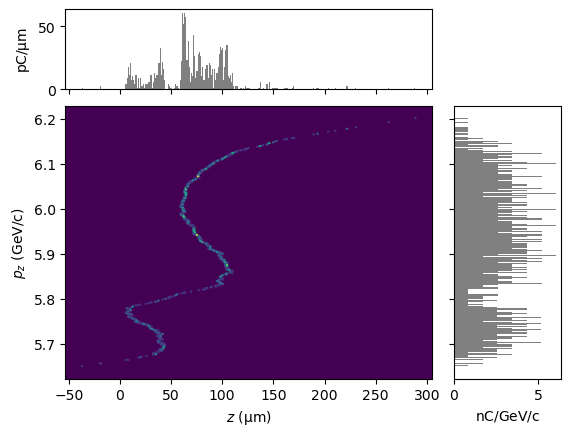




-12 -38
{'linearCompressionTerm': -0.009000000000000067, 'quadraticCompressionTerm': 0.13500000000000056, 'spacingUm': 45.93057560311176, 'driverLength': 1.4961532082850178e-05, 'witnessLength': 1.0639351551216908e-05, 'longestBunchLength': 1.4961532082850178e-05}


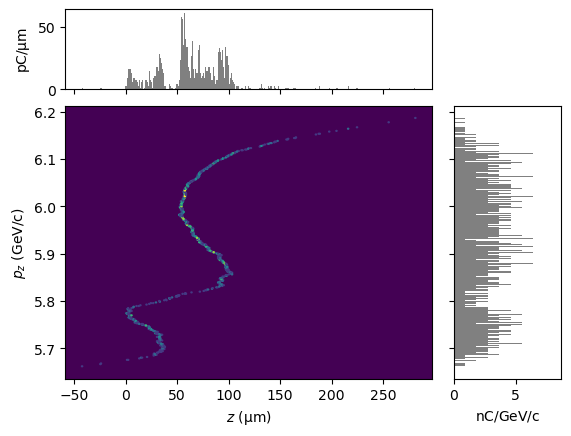




-12 -36
{'linearCompressionTerm': -0.006400000000000083, 'quadraticCompressionTerm': 0.13000000000000056, 'spacingUm': 43.08604322466743, 'driverLength': 1.4955622692753295e-05, 'witnessLength': 1.0011694363080337e-05, 'longestBunchLength': 1.4955622692753295e-05}


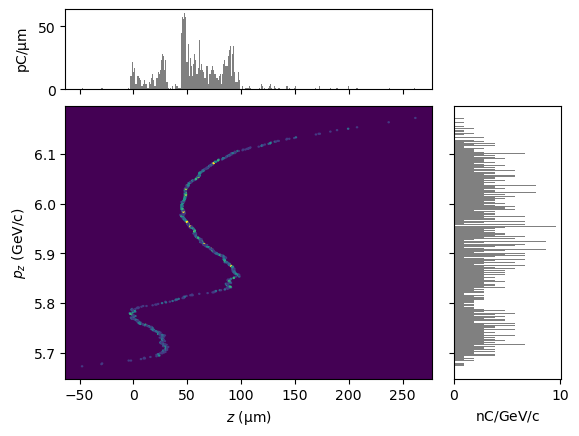




-12 -34
{'linearCompressionTerm': -0.0036000000000000996, 'quadraticCompressionTerm': 0.12000000000000055, 'spacingUm': 48.323657675421245, 'driverLength': 1.485215867416711e-05, 'witnessLength': 8.478676217769284e-06, 'longestBunchLength': 1.485215867416711e-05}


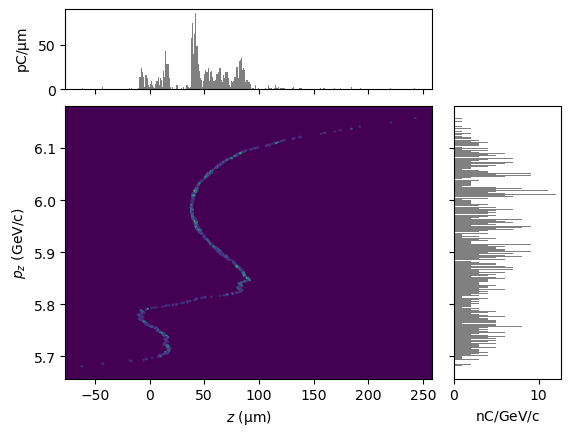




-12 -32
{'linearCompressionTerm': -0.001400000000000113, 'quadraticCompressionTerm': 0.05000000000000049, 'spacingUm': 42.39405727749116, 'driverLength': 1.874944027727083e-05, 'witnessLength': 1.659416642798249e-05, 'longestBunchLength': 1.874944027727083e-05}


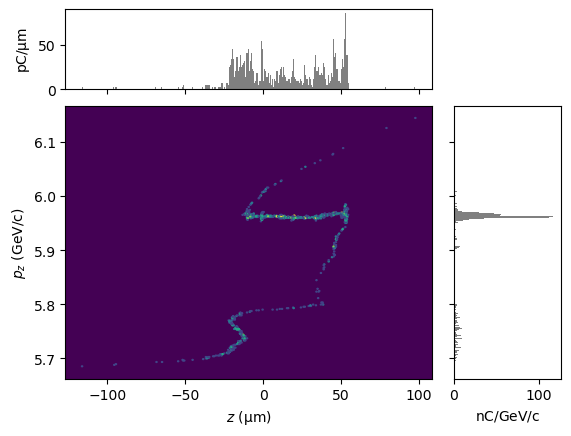




-12 -30



-12 -28



-12 -26



-12 -24



-12 -22



-12 -20



-12 -18



-12 -16



-12 -14



-12 -12



-12 -10



-12 -8



-12 -6



-12 -4



-12 -2



-10 -50
{'linearCompressionTerm': -0.02, 'quadraticCompressionTerm': 0.23000000000000065, 'spacingUm': 45.78678546278295, 'driverLength': 0.00013050910264339813, 'witnessLength': 6.126243009794443e-05, 'longestBunchLength': 0.00013050910264339813}


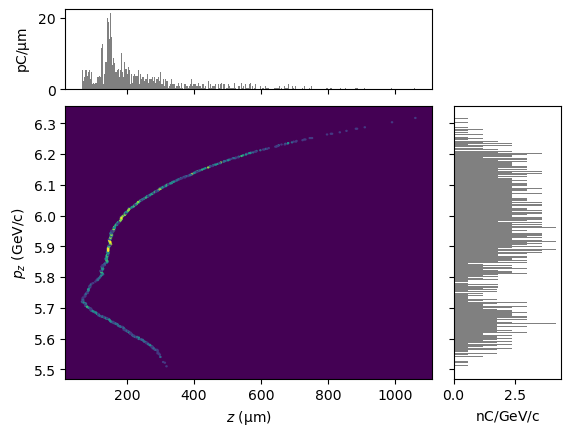




-10 -48
{'linearCompressionTerm': -0.02, 'quadraticCompressionTerm': 0.1750000000000006, 'spacingUm': 42.21856651940231, 'driverLength': 5.56041972704657e-05, 'witnessLength': 2.974412429278875e-05, 'longestBunchLength': 5.56041972704657e-05}


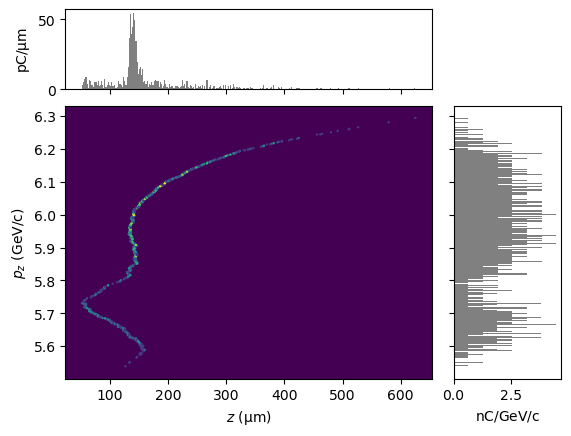




-10 -46
{'linearCompressionTerm': -0.019400000000000004, 'quadraticCompressionTerm': 0.13000000000000056, 'spacingUm': 45.608820106745874, 'driverLength': 1.5056752120297195e-05, 'witnessLength': 1.206911341666981e-05, 'longestBunchLength': 1.5056752120297195e-05}


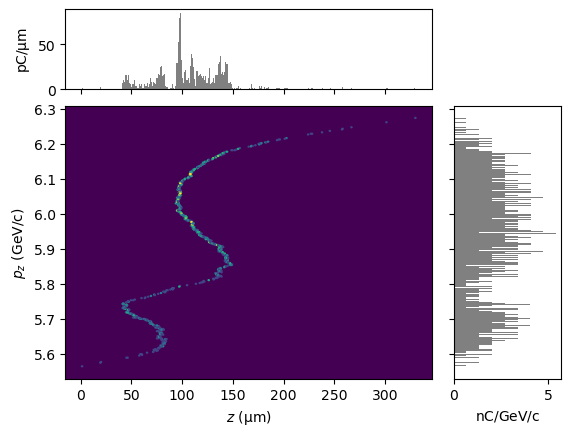




-10 -44
{'linearCompressionTerm': -0.017200000000000017, 'quadraticCompressionTerm': 0.13500000000000056, 'spacingUm': 42.752718325788905, 'driverLength': 1.54385586859172e-05, 'witnessLength': 1.2077680326064686e-05, 'longestBunchLength': 1.54385586859172e-05}


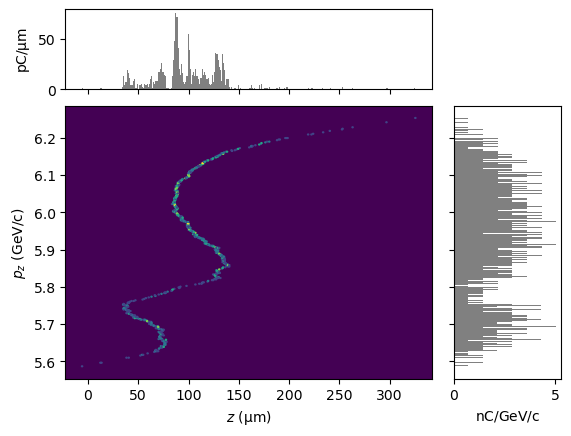




-10 -42
{'linearCompressionTerm': -0.014800000000000032, 'quadraticCompressionTerm': 0.13500000000000056, 'spacingUm': 47.940989951429835, 'driverLength': 1.5431563996252233e-05, 'witnessLength': 1.1027651730387161e-05, 'longestBunchLength': 1.5431563996252233e-05}


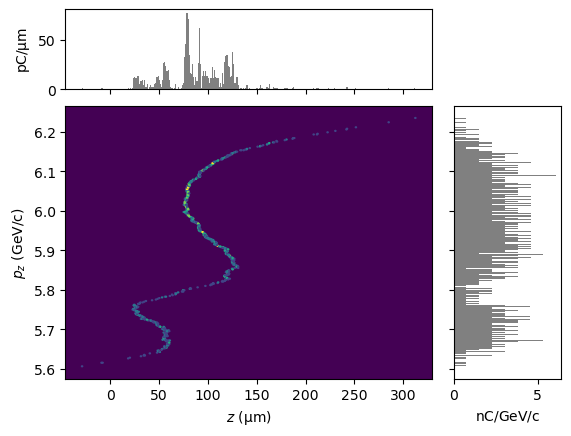




-10 -40
{'linearCompressionTerm': -0.012200000000000048, 'quadraticCompressionTerm': 0.14000000000000057, 'spacingUm': 49.664267096083655, 'driverLength': 1.5752199321849408e-05, 'witnessLength': 1.1040963111585844e-05, 'longestBunchLength': 1.5752199321849408e-05}


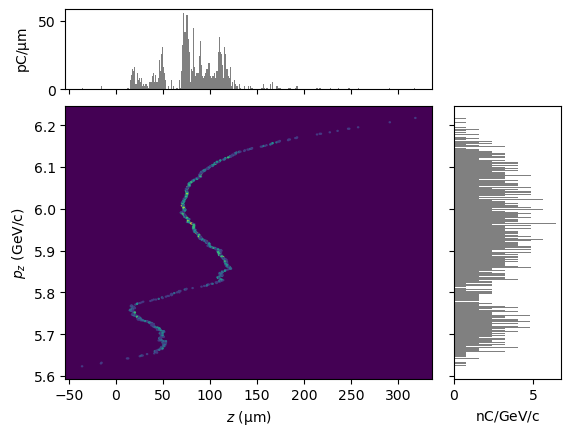




-10 -38
{'linearCompressionTerm': -0.009800000000000062, 'quadraticCompressionTerm': 0.13500000000000056, 'spacingUm': 46.38945217974225, 'driverLength': 1.6139379587232847e-05, 'witnessLength': 1.0182953745496166e-05, 'longestBunchLength': 1.6139379587232847e-05}


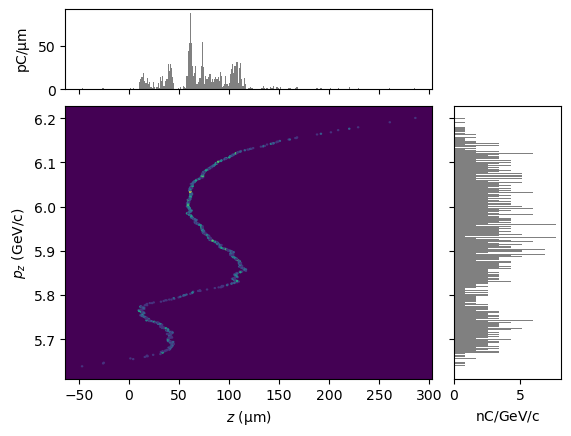




-10 -36
{'linearCompressionTerm': -0.007000000000000079, 'quadraticCompressionTerm': 0.13500000000000056, 'spacingUm': 48.07418620425018, 'driverLength': 1.6071622482029666e-05, 'witnessLength': 9.69642648628562e-06, 'longestBunchLength': 1.6071622482029666e-05}


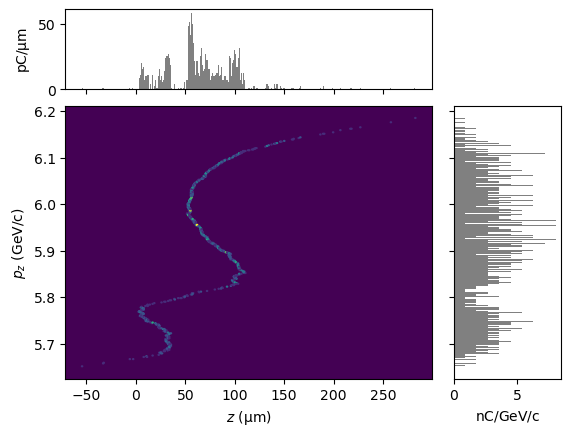




-10 -34
{'linearCompressionTerm': -0.004200000000000096, 'quadraticCompressionTerm': 0.13500000000000056, 'spacingUm': 45.72880034644817, 'driverLength': 1.6670608366135766e-05, 'witnessLength': 9.683873677666673e-06, 'longestBunchLength': 1.6670608366135766e-05}


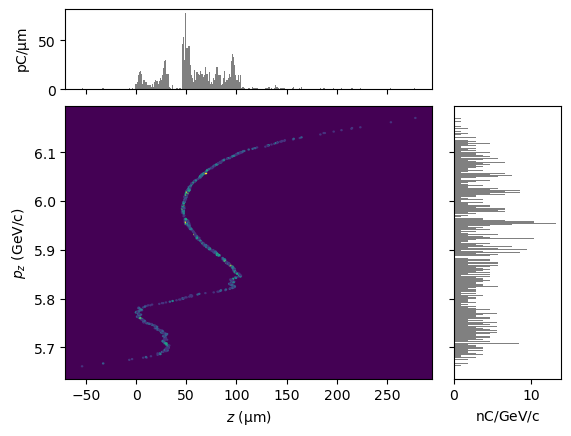




-10 -32
{'linearCompressionTerm': -0.0010000000000001154, 'quadraticCompressionTerm': 0.11000000000000054, 'spacingUm': 45.97972526580384, 'driverLength': 1.70231539117165e-05, 'witnessLength': 1.1550781675131754e-05, 'longestBunchLength': 1.70231539117165e-05}


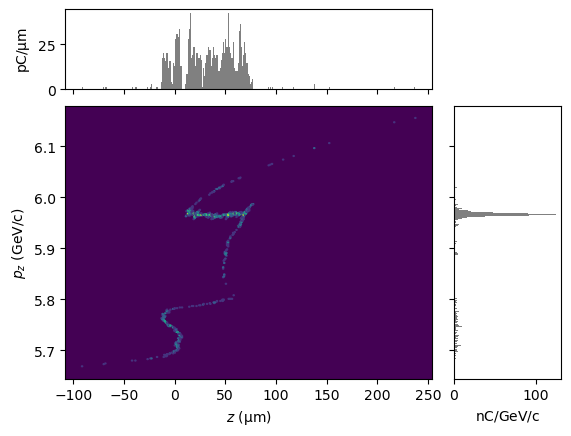




-10 -30



-10 -28



-10 -26



-10 -24



-10 -22



-10 -20



-10 -18



-10 -16



-10 -14



-10 -12



-10 -10



-10 -8



-10 -6



-10 -4



-10 -2



-8 -50
{'linearCompressionTerm': -0.02, 'quadraticCompressionTerm': 0.23500000000000065, 'spacingUm': 48.934399363949346, 'driverLength': 0.00015405665594778463, 'witnessLength': 7.317706748085214e-05, 'longestBunchLength': 0.00015405665594778463}


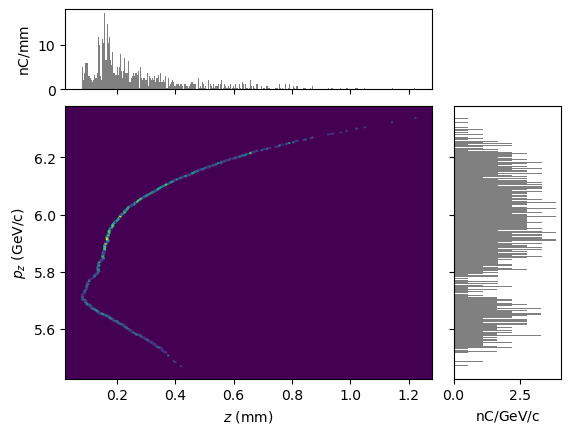




-8 -48
{'linearCompressionTerm': -0.02, 'quadraticCompressionTerm': 0.1850000000000006, 'spacingUm': 44.14003041522093, 'driverLength': 7.476680771067557e-05, 'witnessLength': 3.841518962239439e-05, 'longestBunchLength': 7.476680771067557e-05}


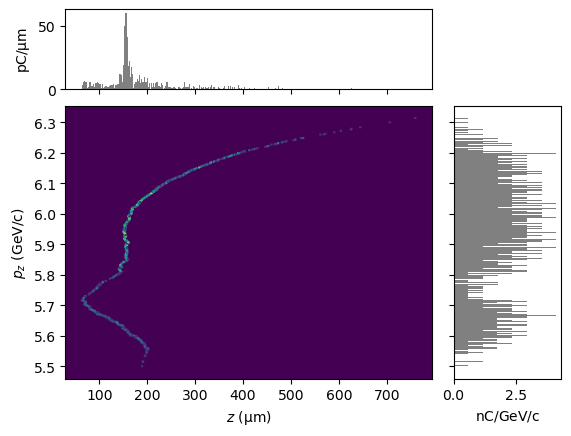




-8 -46
{'linearCompressionTerm': -0.0198, 'quadraticCompressionTerm': 0.13500000000000056, 'spacingUm': 45.77820567524689, 'driverLength': 1.6009026130765847e-05, 'witnessLength': 1.3670328308056864e-05, 'longestBunchLength': 1.6009026130765847e-05}


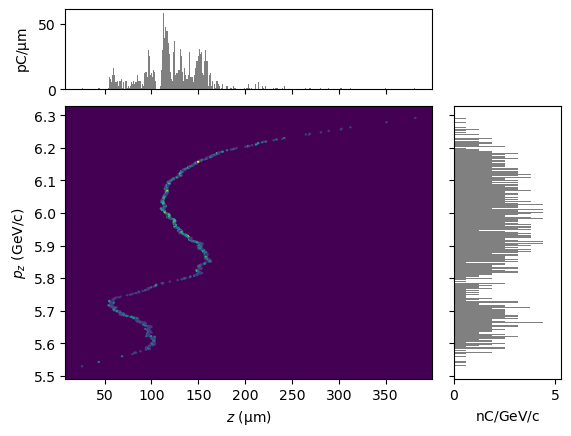




-8 -44
{'linearCompressionTerm': -0.017600000000000015, 'quadraticCompressionTerm': 0.14000000000000057, 'spacingUm': 45.05849729503032, 'driverLength': 1.663570326137631e-05, 'witnessLength': 1.3200870789097742e-05, 'longestBunchLength': 1.663570326137631e-05}


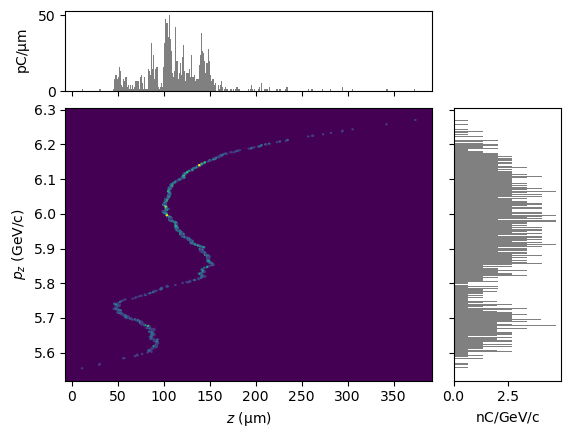




-8 -42
{'linearCompressionTerm': -0.015400000000000028, 'quadraticCompressionTerm': 0.13500000000000056, 'spacingUm': 48.69219198081165, 'driverLength': 1.6605222906793275e-05, 'witnessLength': 1.0715932687323434e-05, 'longestBunchLength': 1.6605222906793275e-05}


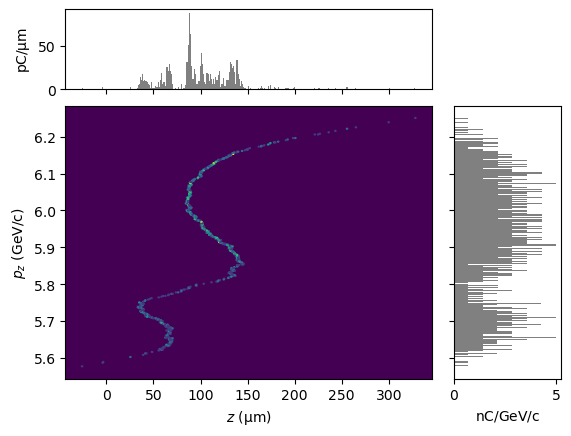




-8 -40
{'linearCompressionTerm': -0.012800000000000044, 'quadraticCompressionTerm': 0.14500000000000057, 'spacingUm': 46.3428552789637, 'driverLength': 1.696262142587184e-05, 'witnessLength': 1.1833163194915647e-05, 'longestBunchLength': 1.696262142587184e-05}


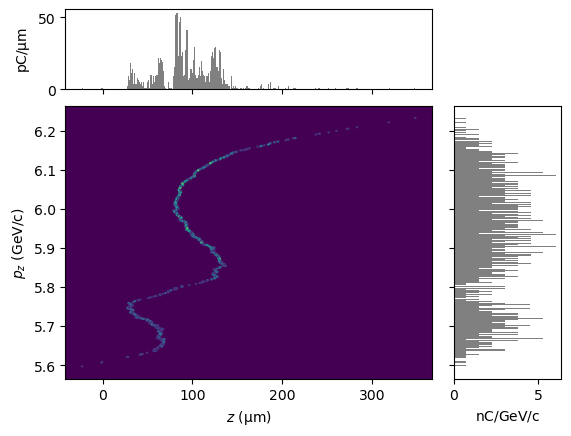




-8 -38
{'linearCompressionTerm': -0.01020000000000006, 'quadraticCompressionTerm': 0.14500000000000057, 'spacingUm': 48.32763739132887, 'driverLength': 1.7203779656845345e-05, 'witnessLength': 1.0717592447260664e-05, 'longestBunchLength': 1.7203779656845345e-05}


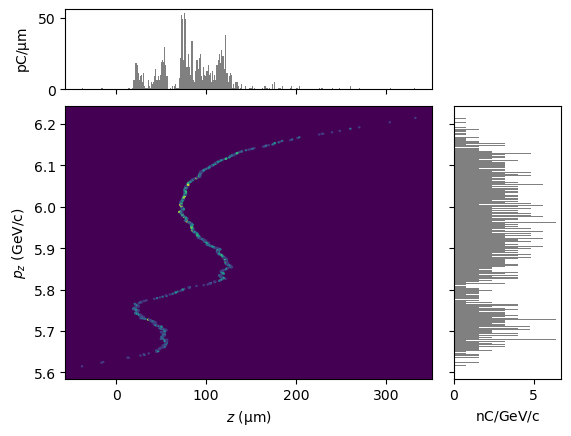




-8 -36
{'linearCompressionTerm': -0.0076000000000000754, 'quadraticCompressionTerm': 0.14000000000000057, 'spacingUm': 48.582444276045194, 'driverLength': 1.7347093298094512e-05, 'witnessLength': 9.84471321567288e-06, 'longestBunchLength': 1.7347093298094512e-05}


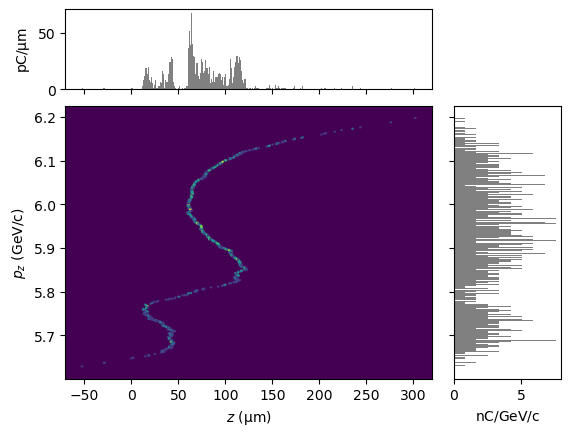




-8 -34
{'linearCompressionTerm': -0.004800000000000092, 'quadraticCompressionTerm': 0.13500000000000056, 'spacingUm': 49.40148362024751, 'driverLength': 1.771490082539195e-05, 'witnessLength': 9.015504878924764e-06, 'longestBunchLength': 1.771490082539195e-05}


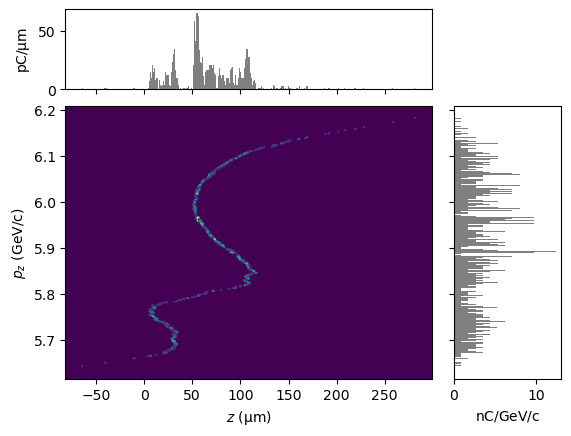




-8 -32
{'linearCompressionTerm': -0.0010000000000001154, 'quadraticCompressionTerm': 0.14000000000000057, 'spacingUm': 48.411164420166386, 'driverLength': 1.5076267801066136e-05, 'witnessLength': 1.0137979506664107e-05, 'longestBunchLength': 1.5076267801066136e-05}


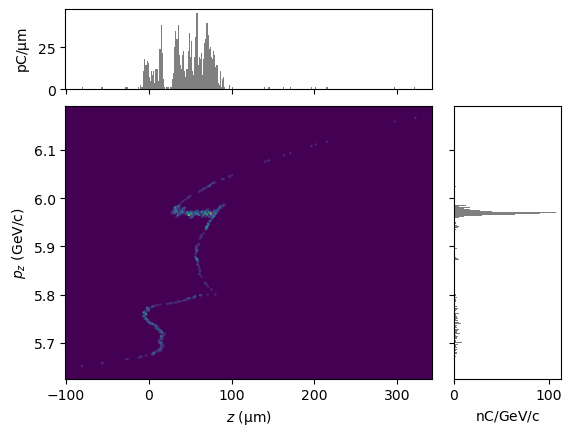




-8 -30



-8 -28



-8 -26



-8 -24



-8 -22



-8 -20



-8 -18



-8 -16



-8 -14



-8 -12



-8 -10



-8 -8



-8 -6



-8 -4



-8 -2



-6 -50
{'linearCompressionTerm': -0.02, 'quadraticCompressionTerm': 0.24000000000000066, 'spacingUm': 46.75589801685955, 'driverLength': 0.00017762817394216396, 'witnessLength': 8.850729469189994e-05, 'longestBunchLength': 0.00017762817394216396}


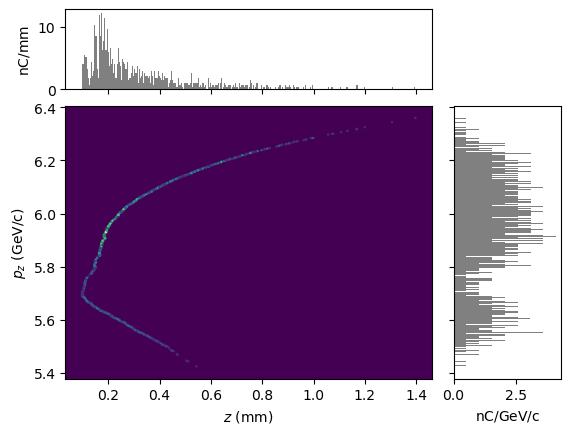




-6 -48
{'linearCompressionTerm': -0.02, 'quadraticCompressionTerm': 0.19500000000000062, 'spacingUm': 42.423508531045705, 'driverLength': 9.504477591466433e-05, 'witnessLength': 4.998017567295024e-05, 'longestBunchLength': 9.504477591466433e-05}


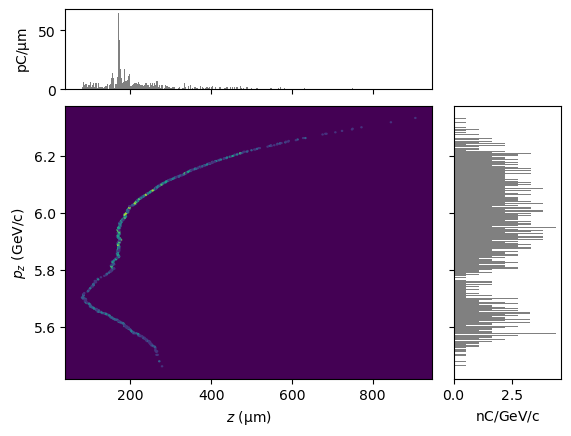




-6 -46
{'linearCompressionTerm': -0.02, 'quadraticCompressionTerm': 0.14500000000000057, 'spacingUm': 44.31108531858428, 'driverLength': 2.5255537941888024e-05, 'witnessLength': 1.8910451803601496e-05, 'longestBunchLength': 2.5255537941888024e-05}


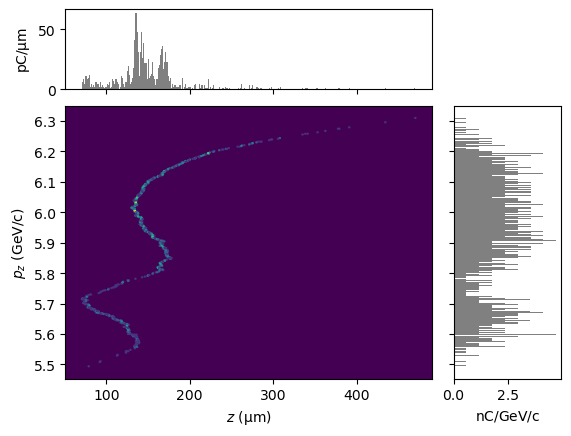




-6 -44
{'linearCompressionTerm': -0.01820000000000001, 'quadraticCompressionTerm': 0.13500000000000056, 'spacingUm': 44.30357175672881, 'driverLength': 1.7074758893418172e-05, 'witnessLength': 1.2478959053348534e-05, 'longestBunchLength': 1.7074758893418172e-05}


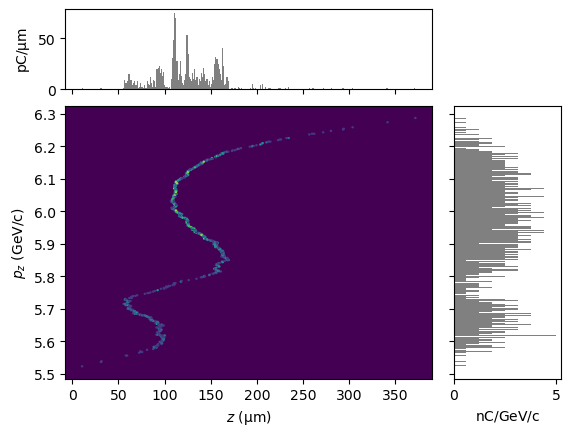




-6 -42
{'linearCompressionTerm': -0.015800000000000026, 'quadraticCompressionTerm': 0.14000000000000057, 'spacingUm': 48.40130942151971, 'driverLength': 1.7295523072543412e-05, 'witnessLength': 1.1805581845211646e-05, 'longestBunchLength': 1.7295523072543412e-05}


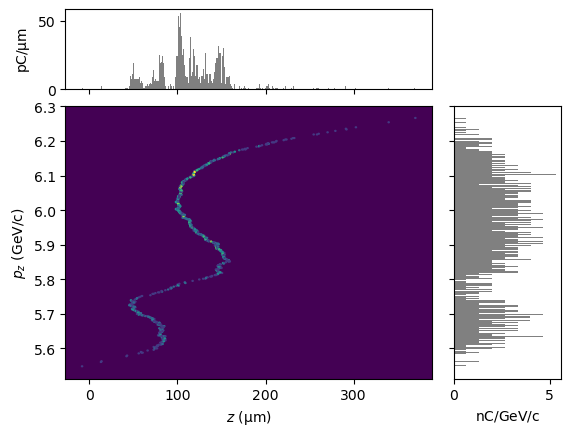




-6 -40
{'linearCompressionTerm': -0.01340000000000004, 'quadraticCompressionTerm': 0.14500000000000057, 'spacingUm': 42.63328032996032, 'driverLength': 1.8032208534318346e-05, 'witnessLength': 1.180842194176773e-05, 'longestBunchLength': 1.8032208534318346e-05}


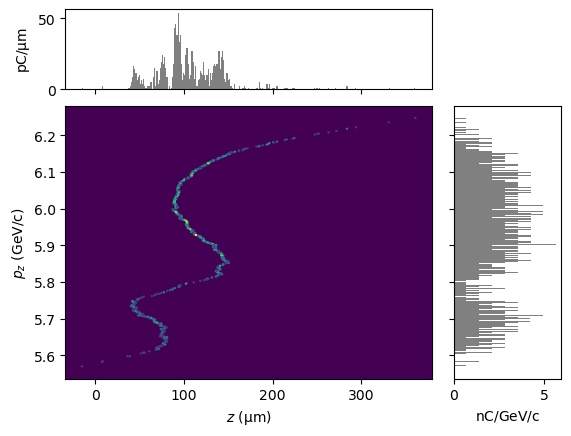




-6 -38
{'linearCompressionTerm': -0.010800000000000056, 'quadraticCompressionTerm': 0.14500000000000057, 'spacingUm': 47.53436099042202, 'driverLength': 1.812143230646116e-05, 'witnessLength': 1.0744364480633948e-05, 'longestBunchLength': 1.812143230646116e-05}


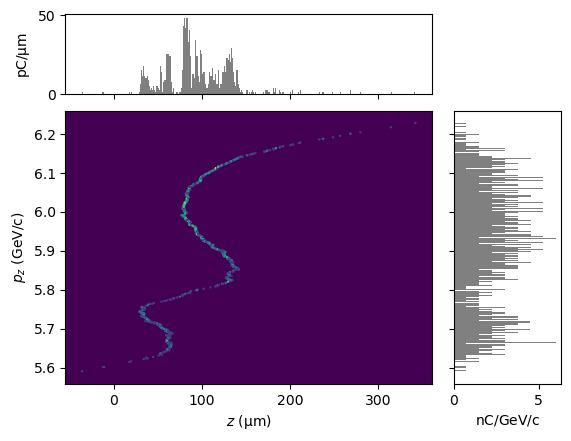




-6 -36
{'linearCompressionTerm': -0.008000000000000073, 'quadraticCompressionTerm': 0.15000000000000058, 'spacingUm': 47.92190280934309, 'driverLength': 1.8783363506578536e-05, 'witnessLength': 1.0874118067227896e-05, 'longestBunchLength': 1.8783363506578536e-05}


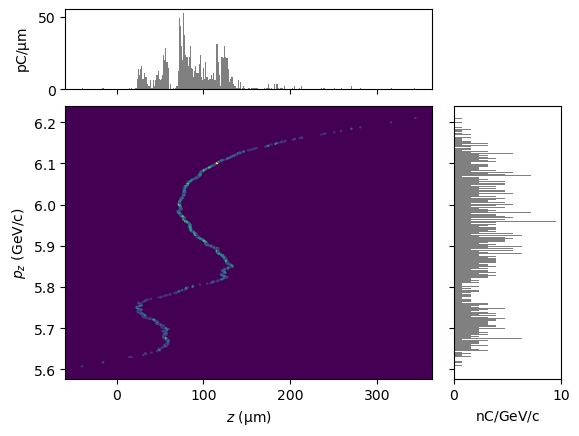




-6 -34
{'linearCompressionTerm': -0.00520000000000009, 'quadraticCompressionTerm': 0.15000000000000058, 'spacingUm': 45.84977410930068, 'driverLength': 1.916653954290569e-05, 'witnessLength': 1.042756474122888e-05, 'longestBunchLength': 1.916653954290569e-05}


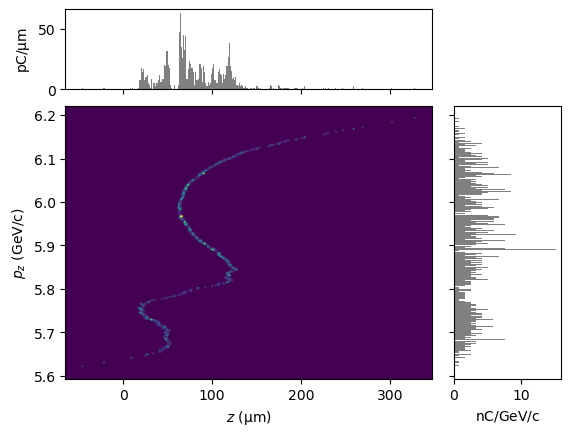




-6 -32
{'linearCompressionTerm': -0.0008000000000001166, 'quadraticCompressionTerm': 0.1800000000000006, 'spacingUm': 45.73546589528723, 'driverLength': 1.3592493735491956e-05, 'witnessLength': 1.1953817946743146e-05, 'longestBunchLength': 1.3592493735491956e-05}


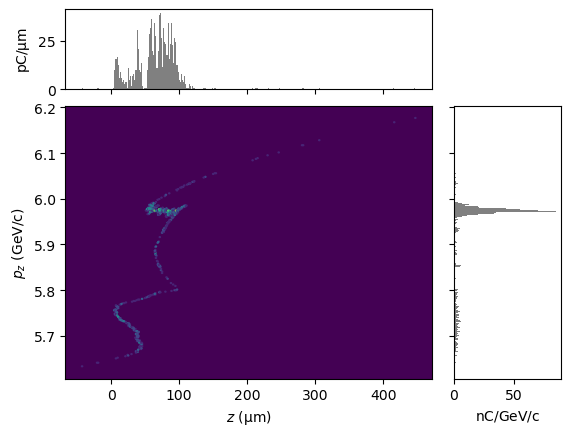




-6 -30
{'linearCompressionTerm': 0.004999999999999848, 'quadraticCompressionTerm': 0.2750000000000007, 'spacingUm': 46.600359053346494, 'driverLength': 3.772515926902403e-05, 'witnessLength': 3.764672022147467e-05, 'longestBunchLength': 3.772515926902403e-05}


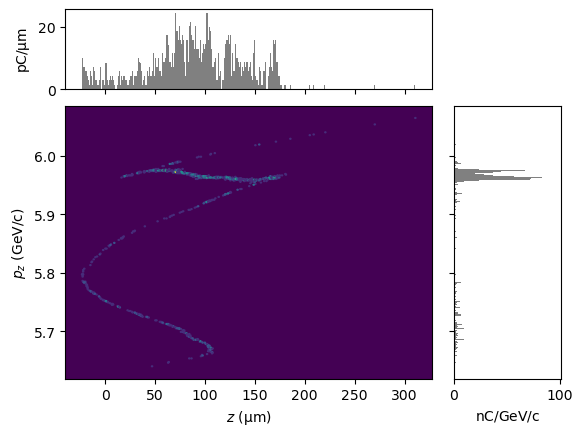




-6 -28
{'linearCompressionTerm': 0.010799999999999813, 'quadraticCompressionTerm': 0.44000000000000083, 'spacingUm': 48.42693700645324, 'driverLength': 7.467851452400579e-05, 'witnessLength': 2.839299986771634e-05, 'longestBunchLength': 7.467851452400579e-05}


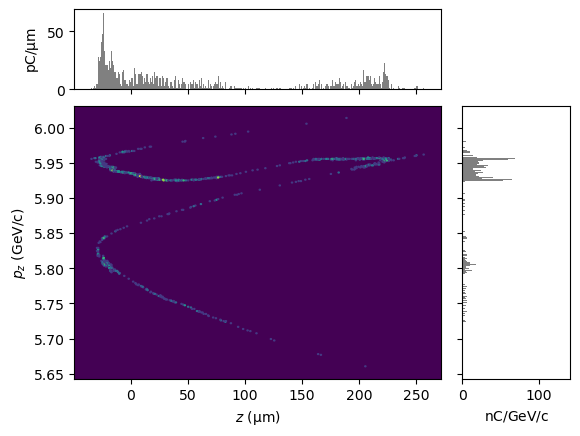




-6 -26
{'linearCompressionTerm': 0.018399999999999767, 'quadraticCompressionTerm': 0.4950000000000009, 'spacingUm': 46.459164768267144, 'driverLength': 8.246983363780942e-05, 'witnessLength': 1.6961756572218116e-05, 'longestBunchLength': 8.246983363780942e-05}


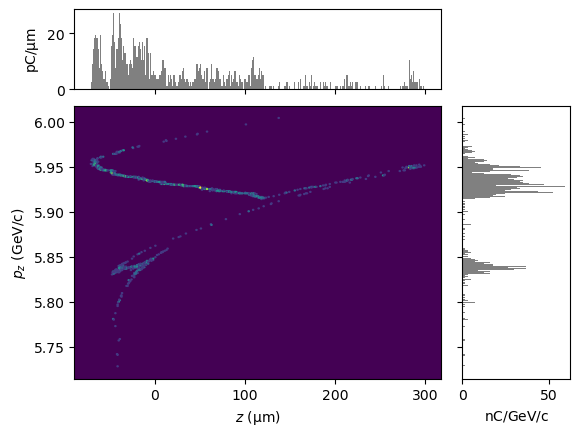




-6 -24



-6 -22



-6 -20



-6 -18



-6 -16



-6 -14



-6 -12



-6 -10



-6 -8



-6 -6



-6 -4



-6 -2



-4 -50
{'linearCompressionTerm': -0.02, 'quadraticCompressionTerm': 0.24500000000000066, 'spacingUm': 38.76454603713239, 'driverLength': 0.0002018161074305013, 'witnessLength': 0.00010714965220524577, 'longestBunchLength': 0.0002018161074305013}


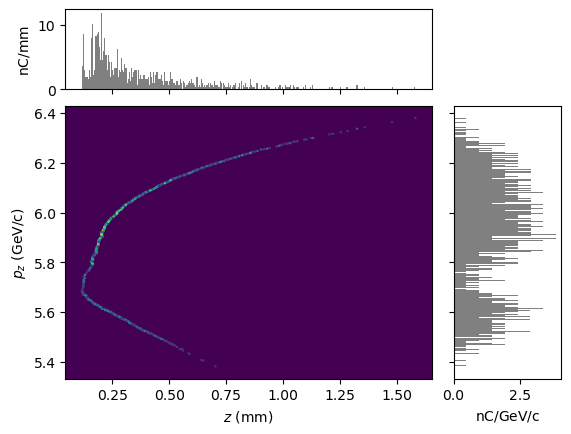




-4 -48
{'linearCompressionTerm': -0.02, 'quadraticCompressionTerm': 0.20000000000000062, 'spacingUm': 45.04589188645015, 'driverLength': 0.00011384383280755085, 'witnessLength': 5.9875510499222456e-05, 'longestBunchLength': 0.00011384383280755085}


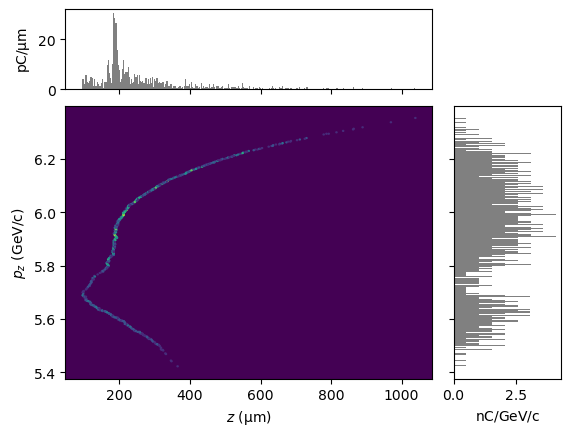




-4 -46
{'linearCompressionTerm': -0.02, 'quadraticCompressionTerm': 0.15500000000000058, 'spacingUm': 47.26771921684326, 'driverLength': 3.6752802644557775e-05, 'witnessLength': 2.5852075426685272e-05, 'longestBunchLength': 3.6752802644557775e-05}


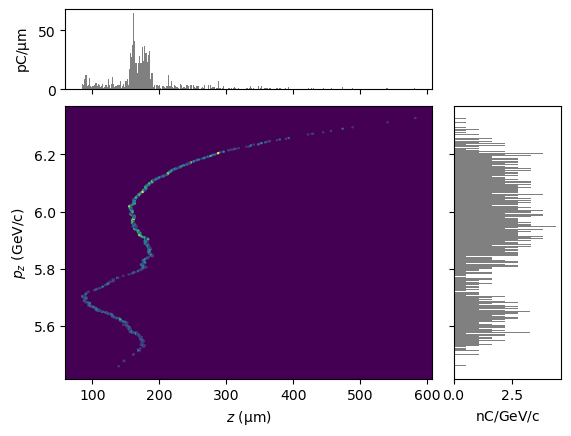




-4 -44
{'linearCompressionTerm': -0.01860000000000001, 'quadraticCompressionTerm': 0.13500000000000056, 'spacingUm': 45.32067488453859, 'driverLength': 1.7794616617590812e-05, 'witnessLength': 1.2773397018652726e-05, 'longestBunchLength': 1.7794616617590812e-05}


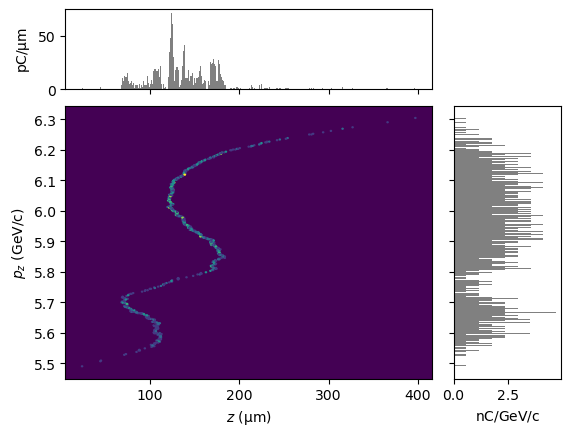




-4 -42
{'linearCompressionTerm': -0.016200000000000023, 'quadraticCompressionTerm': 0.14500000000000057, 'spacingUm': 44.018558071449974, 'driverLength': 1.8484842713121905e-05, 'witnessLength': 1.340504174453247e-05, 'longestBunchLength': 1.8484842713121905e-05}


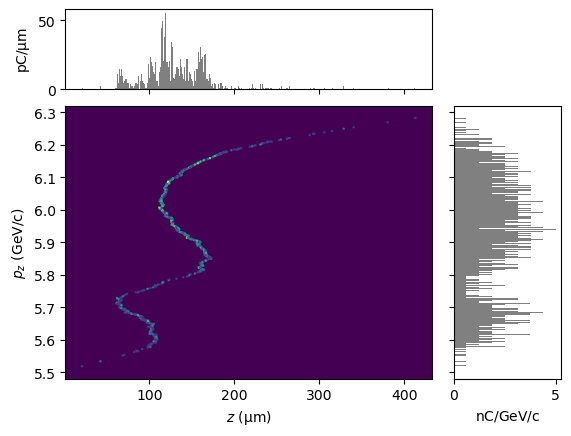




-4 -40
{'linearCompressionTerm': -0.013800000000000038, 'quadraticCompressionTerm': 0.14500000000000057, 'spacingUm': 47.148871184121404, 'driverLength': 1.8704309364421043e-05, 'witnessLength': 1.1461628396273667e-05, 'longestBunchLength': 1.8704309364421043e-05}


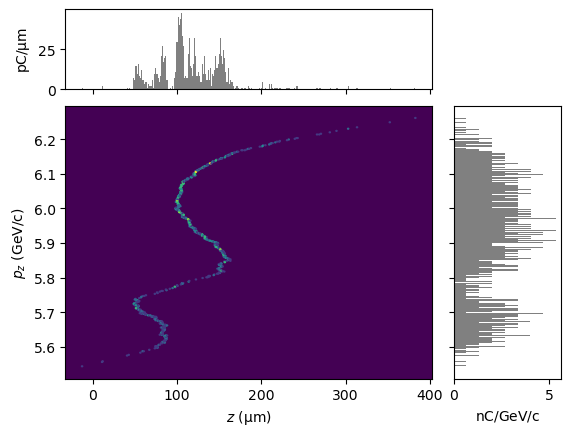




-4 -38
{'linearCompressionTerm': -0.011200000000000054, 'quadraticCompressionTerm': 0.15000000000000058, 'spacingUm': 46.99161867180636, 'driverLength': 1.912829242460857e-05, 'witnessLength': 1.1383265439866211e-05, 'longestBunchLength': 1.912829242460857e-05}


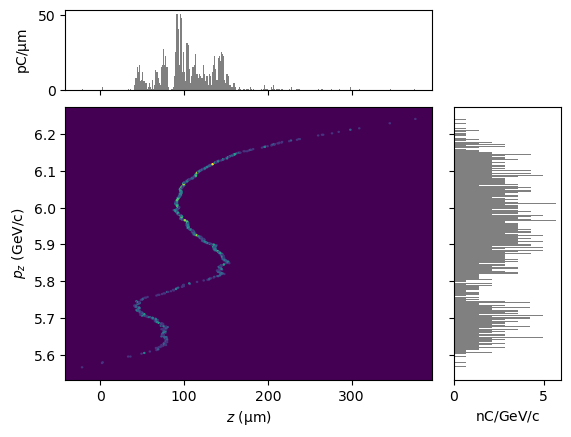




-4 -36
{'linearCompressionTerm': -0.00860000000000007, 'quadraticCompressionTerm': 0.14500000000000057, 'spacingUm': 48.42211112271931, 'driverLength': 1.9371046075415433e-05, 'witnessLength': 1.0241403046254875e-05, 'longestBunchLength': 1.9371046075415433e-05}


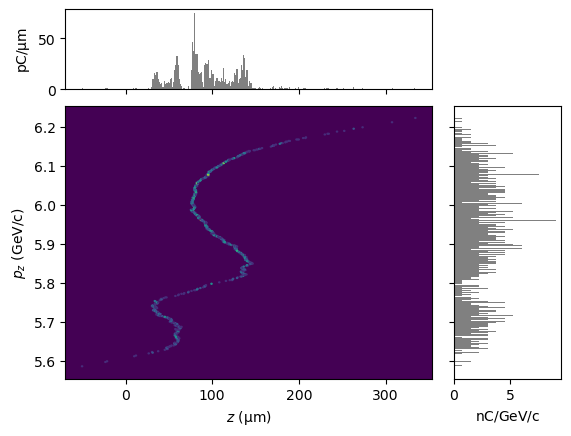




-4 -34
{'linearCompressionTerm': -0.0056000000000000875, 'quadraticCompressionTerm': 0.15500000000000058, 'spacingUm': 47.11979488578908, 'driverLength': 2.0251523604216103e-05, 'witnessLength': 1.0681787615740092e-05, 'longestBunchLength': 2.0251523604216103e-05}


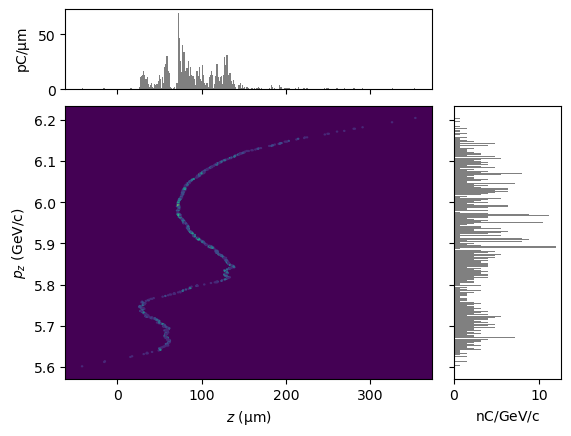




-4 -32
{'linearCompressionTerm': -0.0012000000000001142, 'quadraticCompressionTerm': 0.1850000000000006, 'spacingUm': 46.37857967916843, 'driverLength': 1.2716181018907258e-05, 'witnessLength': 1.227654282824599e-05, 'longestBunchLength': 1.2716181018907258e-05}


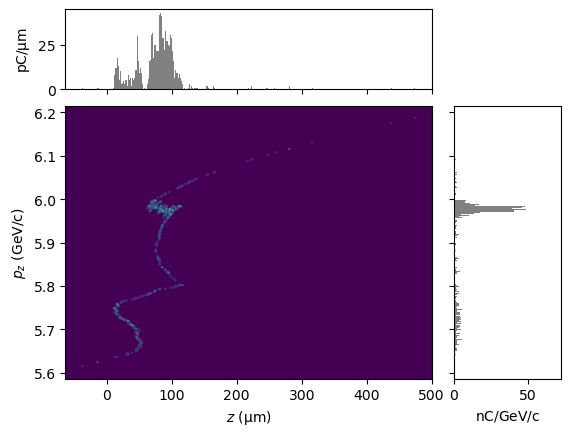




-4 -30
{'linearCompressionTerm': 0.004199999999999853, 'quadraticCompressionTerm': 0.2600000000000007, 'spacingUm': 44.32872535073329, 'driverLength': 3.117234142364707e-05, 'witnessLength': 3.120718196356732e-05, 'longestBunchLength': 3.120718196356732e-05}


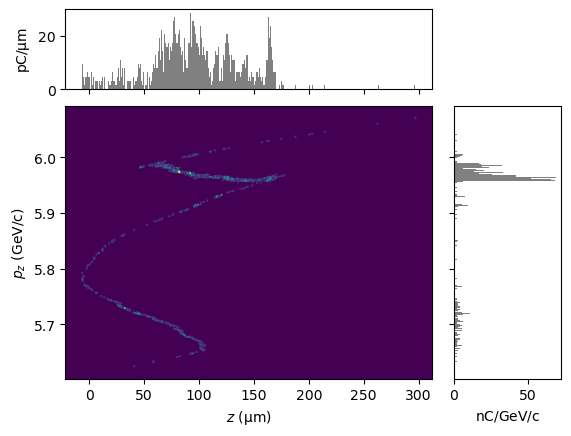




-4 -28
{'linearCompressionTerm': 0.00979999999999982, 'quadraticCompressionTerm': 0.45500000000000085, 'spacingUm': 34.71436849085632, 'driverLength': 7.065559371758567e-05, 'witnessLength': 4.604561172439351e-05, 'longestBunchLength': 7.065559371758567e-05}


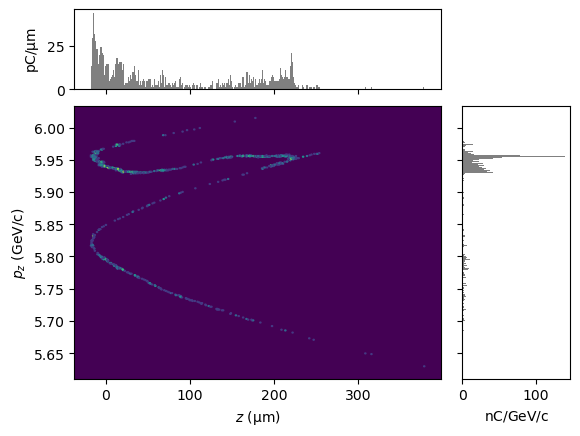




-4 -26
{'linearCompressionTerm': 0.016799999999999777, 'quadraticCompressionTerm': 0.4950000000000009, 'spacingUm': 45.22452285457879, 'driverLength': 9.702579584284662e-05, 'witnessLength': 1.392052210220414e-05, 'longestBunchLength': 9.702579584284662e-05}


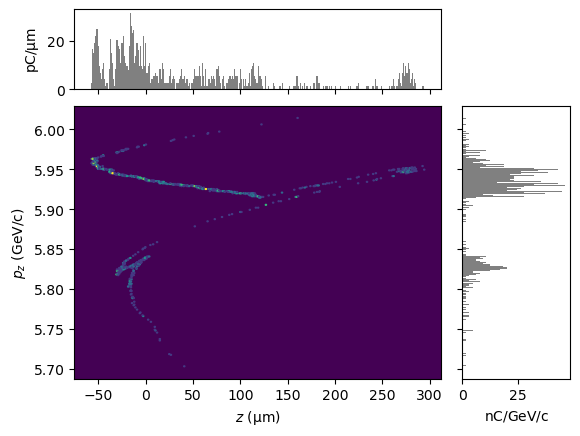




-4 -24



-4 -22



-4 -20



-4 -18



-4 -16



-4 -14



-4 -12



-4 -10



-4 -8



-4 -6



-4 -4



-4 -2



-2 -50
{'linearCompressionTerm': -0.02, 'quadraticCompressionTerm': 0.24500000000000066, 'spacingUm': 38.271750654123046, 'driverLength': 0.0002238829648225947, 'witnessLength': 0.00012298268428172324, 'longestBunchLength': 0.0002238829648225947}


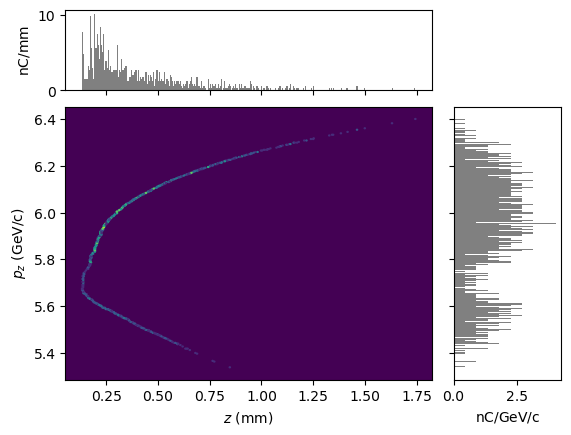




-2 -48
{'linearCompressionTerm': -0.02, 'quadraticCompressionTerm': 0.20500000000000063, 'spacingUm': 43.2892171014249, 'driverLength': 0.0001331699806892761, 'witnessLength': 7.172477330358704e-05, 'longestBunchLength': 0.0001331699806892761}


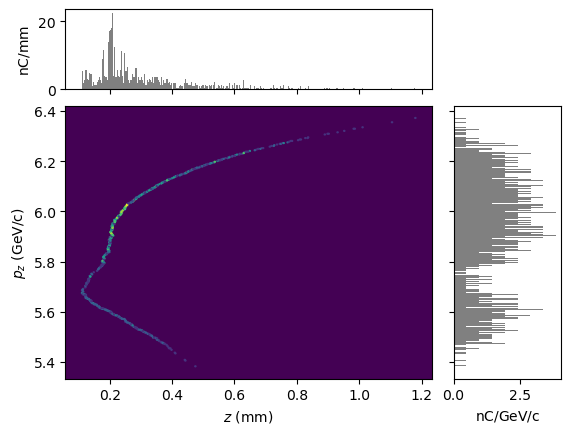




-2 -46
{'linearCompressionTerm': -0.02, 'quadraticCompressionTerm': 0.1600000000000006, 'spacingUm': 48.95956113427878, 'driverLength': 4.870655697704259e-05, 'witnessLength': 3.131289888507342e-05, 'longestBunchLength': 4.870655697704259e-05}


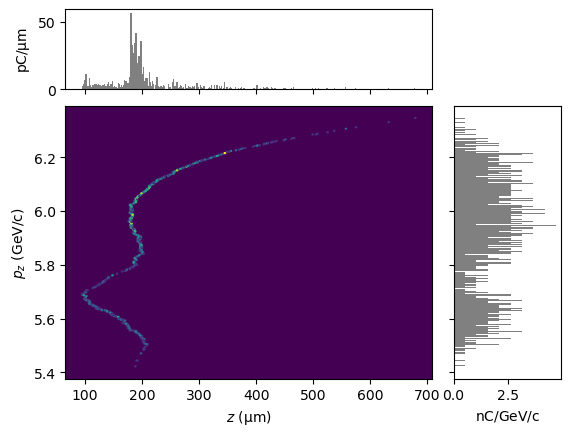




-2 -44
{'linearCompressionTerm': -0.019000000000000006, 'quadraticCompressionTerm': 0.13500000000000056, 'spacingUm': 43.58131178376103, 'driverLength': 1.8548084046914145e-05, 'witnessLength': 1.3480750933321127e-05, 'longestBunchLength': 1.8548084046914145e-05}


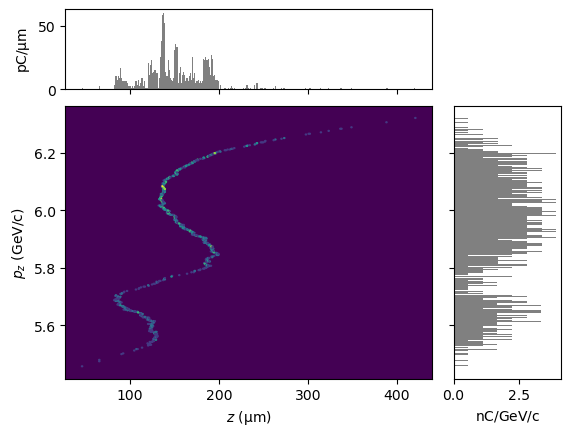




-2 -42
{'linearCompressionTerm': -0.01660000000000002, 'quadraticCompressionTerm': 0.14500000000000057, 'spacingUm': 43.03095976810776, 'driverLength': 1.9301279221830892e-05, 'witnessLength': 1.4056374375843791e-05, 'longestBunchLength': 1.9301279221830892e-05}


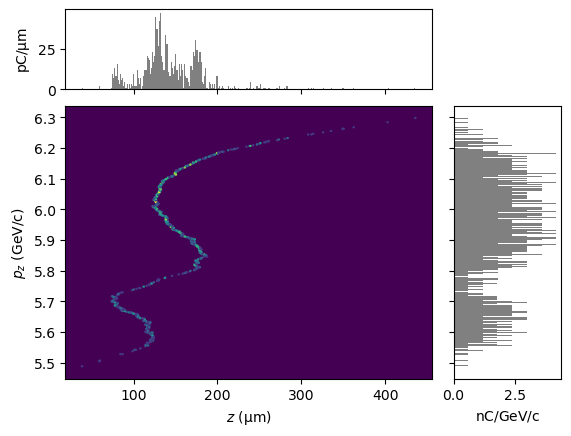




-2 -40
{'linearCompressionTerm': -0.014200000000000036, 'quadraticCompressionTerm': 0.14500000000000057, 'spacingUm': 48.32305945070525, 'driverLength': 1.934349400946074e-05, 'witnessLength': 1.1550850734445309e-05, 'longestBunchLength': 1.934349400946074e-05}


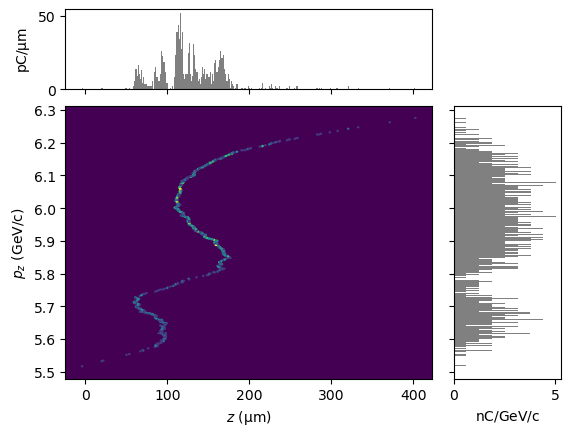




-2 -38
{'linearCompressionTerm': -0.011600000000000051, 'quadraticCompressionTerm': 0.15000000000000058, 'spacingUm': 48.777537401710845, 'driverLength': 1.9747246824467165e-05, 'witnessLength': 1.1147806449185568e-05, 'longestBunchLength': 1.9747246824467165e-05}


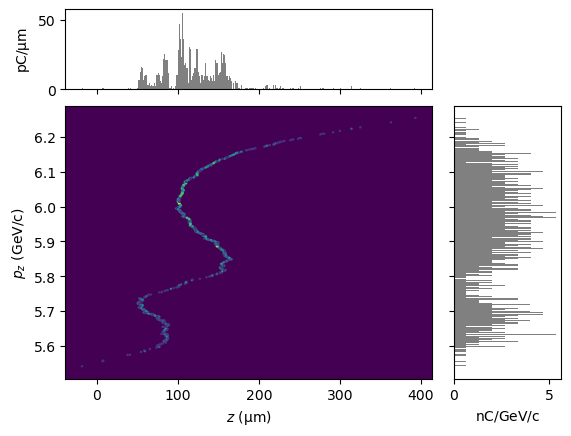




-2 -36
{'linearCompressionTerm': -0.009000000000000067, 'quadraticCompressionTerm': 0.15000000000000058, 'spacingUm': 45.34257501074346, 'driverLength': 2.0255798327463776e-05, 'witnessLength': 1.0605581695812836e-05, 'longestBunchLength': 2.0255798327463776e-05}


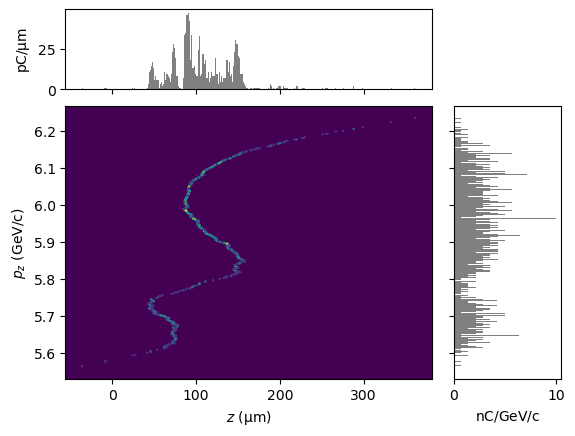




-2 -34
{'linearCompressionTerm': -0.006000000000000085, 'quadraticCompressionTerm': 0.1600000000000006, 'spacingUm': 45.12195978591019, 'driverLength': 2.1088663080814413e-05, 'witnessLength': 1.1320608223090108e-05, 'longestBunchLength': 2.1088663080814413e-05}


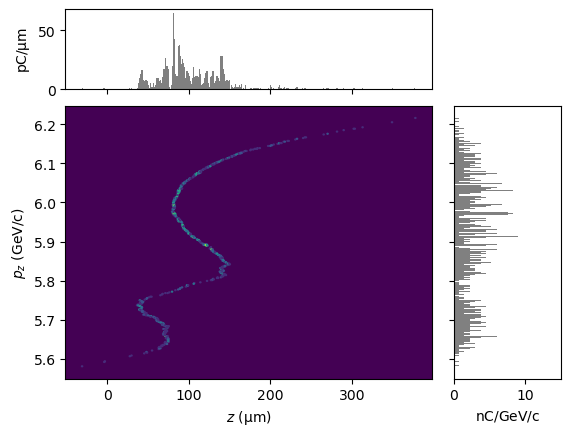




-2 -32
{'linearCompressionTerm': -0.0016000000000001117, 'quadraticCompressionTerm': 0.1850000000000006, 'spacingUm': 49.57420732202355, 'driverLength': 1.1781893994198353e-05, 'witnessLength': 1.1908335013958027e-05, 'longestBunchLength': 1.1908335013958027e-05}


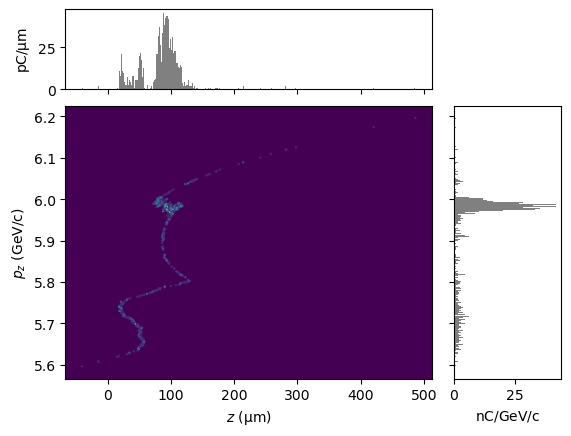




-2 -30
{'linearCompressionTerm': 0.003599999999999857, 'quadraticCompressionTerm': 0.25000000000000067, 'spacingUm': 46.3632100696081, 'driverLength': 2.730040519799381e-05, 'witnessLength': 2.531184119905091e-05, 'longestBunchLength': 2.730040519799381e-05}


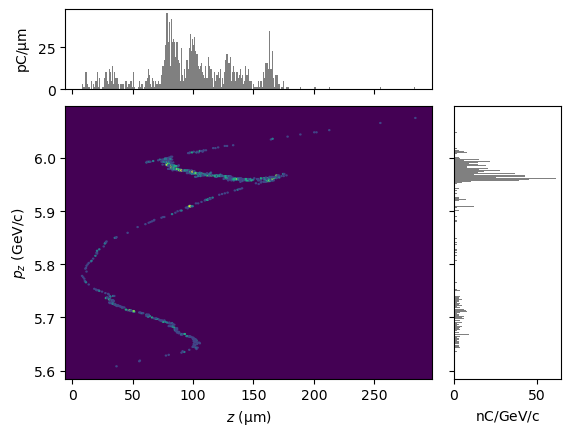




-2 -28
{'linearCompressionTerm': 0.010599999999999814, 'quadraticCompressionTerm': 0.4850000000000009, 'spacingUm': 49.83827251567499, 'driverLength': 6.715916686674286e-05, 'witnessLength': 6.607342811734111e-05, 'longestBunchLength': 6.715916686674286e-05}


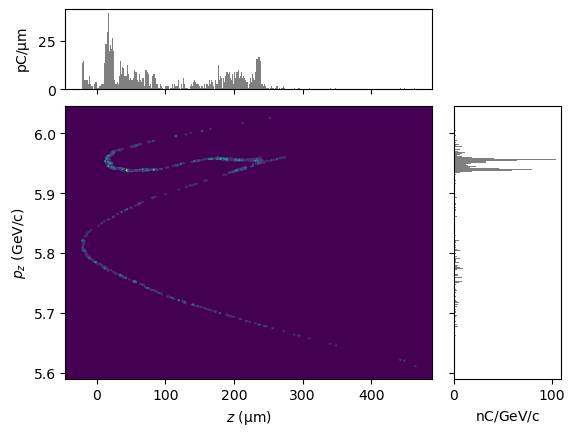




-2 -26
{'linearCompressionTerm': 0.015799999999999783, 'quadraticCompressionTerm': 0.4950000000000009, 'spacingUm': 46.34145740422126, 'driverLength': 9.401631699087391e-05, 'witnessLength': 2.4514421185206645e-05, 'longestBunchLength': 9.401631699087391e-05}


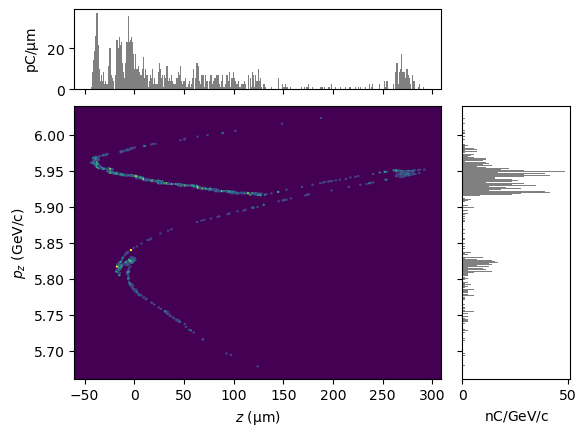




-2 -24



-2 -22



-2 -20



-2 -18



-2 -16



-2 -14



-2 -12



-2 -10



-2 -8



-2 -6



-2 -4



-2 -2


In [8]:
for L1PhaseSet in np.arange(-40, 0, 2):
    for L2PhaseSet in np.arange(-50, 0 , 2):
        
        print("\n\n")
        print(L1PhaseSet, L2PhaseSet)

        try: 
        
            #Set phases and track to BC20
            
            activeSettings = importedDefaultSettings | { "L1PhaseSet" : L1PhaseSet, "L2PhaseSet" : L2PhaseSet }
            
            setLattice(tao, **activeSettings)
            trackBeam(tao, trackEnd = "BEGBC20", **activeSettings)
            P = getBeamAtElement(tao, "BEGBC20")
    
    
    
    
            #Test all first and second order compression settings
            results = []
            
            for linearCompressionTerm in np.arange( -20e-3, 20e-3, 0.2e-3 ):
                for quadraticCompressionTerm in np.arange( -0.5, 0.5, 0.005 ):
                    
                    
                    PMod = P.copy()
                    
                    meanPz = np.mean( PMod.pz ) 
                    normalizedPz = ( PMod.pz - meanPz ) / meanPz
                    PMod.z = PMod.z + linearCompressionTerm * normalizedPz + quadraticCompressionTerm * normalizedPz ** 2
                    
                    PDrive, PWitness = getDriverAndWitness(PMod)
            
                    driverLength = smallestIntervalImpliedSigma( PDrive.z )
                    witnessLength = smallestIntervalImpliedSigma( PWitness.z )
                    
                    results.append(
                        {
                            "linearCompressionTerm" : linearCompressionTerm,
                            "quadraticCompressionTerm" : quadraticCompressionTerm, 
                            "spacingUm" : 1e6 * (np.median(PDrive.z) - np.median(PWitness.z)),
                            "driverLength" : driverLength,
                            "witnessLength" : witnessLength,
                            "longestBunchLength" : max(driverLength, witnessLength)
                        }
                    )
        
    
    
            #Find and apply the best setting
    
            bestDict = getBestCase(results)
    
            linearCompressionTerm = bestDict["linearCompressionTerm"]
            quadraticCompressionTerm = bestDict["quadraticCompressionTerm"]
            
            
            
            PMod = P.copy()
            
            meanPz = np.mean( PMod.pz ) 
            normalizedPz = ( PMod.pz - meanPz ) / meanPz
            PMod.z = PMod.z + linearCompressionTerm * normalizedPz + quadraticCompressionTerm * normalizedPz ** 2
            
            # print(linearCompressionTerm, ", ", quadraticCompressionTerm) 
            # display(plotMod(PMod, 'z', 'pz', bins=300))
            # plt.clf()
            
            # PDrive, PWitness = getDriverAndWitness(PMod)
    
    
    
    
            #Only show results which are within tolerable spacing
            if abs(bestDict["spacingUm"] - targetSpacingUm) < 10: 
                print(bestDict)
                display(plotMod(PMod, 'z', 'pz', bins=300))

        except:
            print("FAILED")